In [1]:
import sys
sys.executable

'/Users/patrickmurphy/mambaforge/envs/jupyterenv/bin/python'

In [2]:
#!/Users/patrickmurphy/miniforge3/bin/python -m pip install plotnine pandas seaborn scipy

In [3]:
import pandas as pd
from plotnine import ggplot, aes, geom_tile, scale_fill_gradientn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy.stats import pearsonr
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import rcParams
from biomart import BiomartServer
import gseapy
from gseapy import barplot, dotplot
from gseapy import enrichr

In [4]:
df_ms_all = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/Heatmap_Tardbp_splicing_Sept2023/Ms_invivo_invitro_leafcutter_results_for_heatmaps.txt", sep='\t')
df_ms_invivo = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/Heatmap_Tardbp_splicing_Sept2023/Ms_invivo_leafcutter_results_for_heatmaps.txt", sep='\t')
df_hs_all = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/Heatmap_Tardbp_splicing_Sept2023/Hs_in vitro_leafcutter_results_for_heatmaps.txt", sep='\t')

In [5]:
TDP43ECKO_v_WT_invitro = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/Heatmap_Tardbp_splicing_Sept2023/Mm10_InVitro_TDP43KO_v_WT_cluster_significance.txt", sep='\t')
TDP43KI_v_WT_invitro = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/Heatmap_Tardbp_splicing_Sept2023/Mm10_InVitro_TDP43KI_v_WT_cluster_significance.txt", sep='\t')
TDP43KI_v_WT_invivo = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/Heatmap_Tardbp_splicing_Sept2023/Mm10_InVivo_TDP43KI_v_WT_cluster_significance.txt", sep='\t')
TDP43ECKO_v_WT_invivo = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/Heatmap_Tardbp_splicing_Sept2023/Mm10_InVivo_ECKO_v_WT_cluster_significance.txt", sep='\t')
GRNKI_v_WT_invivo = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/Heatmap_Tardbp_splicing_Sept2023/Mm10_InVivo_GRNKI_v_WT_cluster_significance.txt", sep='\t')
TDP43GRNKIKO_v_wt_invivo = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/Heatmap_Tardbp_splicing_Sept2023/Mm10_InVivo_AllKOKI_v_AllWT_cluster_significance.txt", sep='\t')

In [6]:
metadata = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/Heatmap_Tardbp_splicing_Sept2023/metadata.txt", sep='\t')

In [7]:
metadata

,column,source,genetic,perturbation
0,Psi_InVivoGrnKIhet1,invivo,GrnKI,none
1,Psi_InVivoGrnKIhet2,invivo,GrnKI,none
2,Psi_InVivoGrnKIhomo1,invivo,GrnKI,none
3,Psi_InVivoGrnKIhomo2,invivo,GrnKI,none
4,Psi_InVivoGrnKIwt1,invivo,GrnWT,none
...,...,...,...,...
91,Reads_TardbpKIwt1.TNF,invitro,TardbpWT,TNF
92,Reads_TardbpKIwt2,invitro,TardbpWT,none
93,Reads_TardbpKIwt2.InnerFlow,invitro,TardbpWT,InnerFlow
94,Reads_TardbpKIwt2.OuterFlow,invitro,TardbpWT,OuterFlow


In [8]:
df_ms_all

,GeneName,GroupID,FeatureID,FeatureType,FeatureLabel,strand,p-value,q-value,dPSI,psi(KIKO),...,Psi_InVivoTardbpBrECKO6,Psi_TardbpKIwt1.InnerFlow,Psi_Tardbp_ECKO.TNF,Psi_Tardbp_ECKO.InnerFlow,Psi_InVivoGrnKIhet2,Psi_Tardbp_WT.InnerFlow,Psi_TardbpKIwt1.TNF,Psi_InVivoTardbpBrECWT4,Psi_InVivoGrnKIhomo1,Psi_InVivoTardbpBrECWT3
0,.,clu_10000_+,i001,intron,chr1:154030693-154031455,+,0.085502,0.280743,-0.042117,0.057542,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,0.044776,0.000000
1,.,clu_10000_+,i002,intron,chr1:154030699-154031455,+,0.085502,0.280743,0.054001,0.907310,...,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,0.865672,1.000000
2,.,clu_10000_+,i003,intron,chr1:154030709-154031455,+,0.085502,0.280743,-0.011884,0.035148,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,0.089552,0.000000
3,.,clu_10001_+,i001,intron,chr1:154031697-154032337,+,0.059554,0.232246,0.091678,0.450177,...,NaN,NaN,NaN,NaN,0.337900,NaN,NaN,1.000000,0.392857,0.441061
4,.,clu_10001_+,i002,intron,chr1:154031697-154035202,+,0.059554,0.232246,-0.015582,0.019791,...,NaN,NaN,NaN,NaN,0.031963,NaN,NaN,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76267,"Gm21857,Gm21742",clu_6737_+,i002,intron,chrY:90757449-90842898,+,0.374422,0.605274,0.001414,0.202937,...,NaN,0.000000,0.200000,0.0,0.200000,0.000000,0.0,NaN,0.214286,0.200000
76268,"Gm21857,Gm21742",clu_6737_+,i003,intron,chrY:90841805-90842898,+,0.374422,0.605274,-0.039485,0.437879,...,NaN,0.500000,0.520000,0.0,0.466667,0.500000,0.0,NaN,0.428571,0.464286
76269,.,clu_6739_+,i001,intron,chrY:90784350-90784606,+,0.628681,0.797754,0.115983,0.184745,...,NaN,0.000000,0.235294,0.0,0.000000,0.222222,0.8,0.407407,NaN,0.000000
76270,.,clu_6739_+,i002,intron,chrY:90784350-90784614,+,0.628681,0.797754,-0.135158,0.603226,...,NaN,0.666667,0.352941,0.0,0.600000,0.777778,0.0,0.592593,NaN,0.555556


In [9]:
# Extract the chromosome from FeatureLabel
df_ms_all['chromosome'] = df_ms_all['FeatureLabel'].str.split(":").str[0]

# Create a new 'cluster' column
df_ms_all['cluster'] = df_ms_all['chromosome'] + ':' + df_ms_all['GroupID']

In [10]:
pd.set_option('display.max_columns', None)
df_ms_all

,GeneName,GroupID,FeatureID,FeatureType,FeatureLabel,strand,p-value,q-value,dPSI,psi(KIKO),psi(WT),Reads_TardbpKIhet1,Reads_InVivoTardbpBrECWT2,Reads_InVivoTardbpBrECKO5,Reads_InVivoGrnKIhomo2,Reads_InVivoTardbpBrECKO2,Reads_Tardbp_ECKO.OuterFlow,Reads_InVivoTardbpKIhet3,Reads_InVivoGrnKIhet1,Reads_Tardbp_WT.OuterFlow,Reads_TardbpKIhet2.TNF,Reads_Tardbp_WT,Reads_TardbpKIhet1.InnerFlow,Reads_Tardbp_WT.TNF,Reads_TardbpKIhet2,Reads_InVivoGrnKIwt1,Reads_TardbpKIhet2.InnerFlow,Reads_TardbpKIhet1.TNF,Reads_InVivoTardbpKIwt2,Reads_TardbpKIwt2,Reads_InVivoTardbpKIhet1,Reads_TardbpKIwt2.TNF,Reads_InVivoTardbpBrECWT5,Reads_TardbpKIwt2.InnerFlow,Reads_TardbpKIhet1.OuterFlow,Reads_InVivoGrnKIwt2,Reads_TardbpKIwt1.OuterFlow,Reads_Tardbp_ECKO,Reads_InVivoTardbpBrECKO1,Reads_InVivoTardbpBrECKO4,Reads_InVivoTardbpBrECWT6,Reads_InVivoTardbpKIwt1,Reads_InVivoTardbpBrECKO3,Reads_InVivoTardbpKIhet2,Reads_TardbpKIwt2.OuterFlow,Reads_TardbpKIhet2.OuterFlow,Reads_InVivoTardbpBrECWT1,Reads_TardbpKIwt1,Reads_InVivoTardbpKIwt3,Reads_InVivoTardbpBrECKO6,Reads_TardbpKIwt1.InnerFlow,Reads_Tardbp_ECKO.TNF,Reads_Tardbp_ECKO.InnerFlow,Reads_InVivoGrnKIhet2,Reads_Tardbp_WT.InnerFlow,Reads_TardbpKIwt1.TNF,Reads_InVivoTardbpBrECWT4,Reads_InVivoGrnKIhomo1,Reads_InVivoTardbpBrECWT3,Psi_TardbpKIhet1,Psi_InVivoTardbpBrECWT2,Psi_InVivoTardbpBrECKO5,Psi_InVivoGrnKIhomo2,Psi_InVivoTardbpBrECKO2,Psi_Tardbp_ECKO.OuterFlow,Psi_InVivoTardbpKIhet3,Psi_InVivoGrnKIhet1,Psi_Tardbp_WT.OuterFlow,Psi_TardbpKIhet2.TNF,Psi_Tardbp_WT,Psi_TardbpKIhet1.InnerFlow,Psi_Tardbp_WT.TNF,Psi_TardbpKIhet2,Psi_InVivoGrnKIwt1,Psi_TardbpKIhet2.InnerFlow,Psi_TardbpKIhet1.TNF,Psi_InVivoTardbpKIwt2,Psi_TardbpKIwt2,Psi_InVivoTardbpKIhet1,Psi_TardbpKIwt2.TNF,Psi_InVivoTardbpBrECWT5,Psi_TardbpKIwt2.InnerFlow,Psi_TardbpKIhet1.OuterFlow,Psi_InVivoGrnKIwt2,Psi_TardbpKIwt1.OuterFlow,Psi_Tardbp_ECKO,Psi_InVivoTardbpBrECKO1,Psi_InVivoTardbpBrECKO4,Psi_InVivoTardbpBrECWT6,Psi_InVivoTardbpKIwt1,Psi_InVivoTardbpBrECKO3,Psi_InVivoTardbpKIhet2,Psi_TardbpKIwt2.OuterFlow,Psi_TardbpKIhet2.OuterFlow,Psi_InVivoTardbpBrECWT1,Psi_TardbpKIwt1,Psi_InVivoTardbpKIwt3,Psi_InVivoTardbpBrECKO6,Psi_TardbpKIwt1.InnerFlow,Psi_Tardbp_ECKO.TNF,Psi_Tardbp_ECKO.InnerFlow,Psi_InVivoGrnKIhet2,Psi_Tardbp_WT.InnerFlow,Psi_TardbpKIwt1.TNF,Psi_InVivoTardbpBrECWT4,Psi_InVivoGrnKIhomo1,Psi_InVivoTardbpBrECWT3,chromosome,cluster
0,.,clu_10000_+,i001,intron,chr1:154030693-154031455,+,0.085502,0.280743,-0.042117,0.057542,0.015425,0,3.0,0.0,0.0,1.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,6.0,0.0,29.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,NaN,0.023622,0.000000,0.000000,0.017857,NaN,0.0,0.112583,NaN,NaN,NaN,0.000000,NaN,NaN,0.025316,NaN,NaN,0.000000,0.000000,0.060172,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,0.117647,0.074074,0.000000,0.295918,0.129032,0.000000,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,0.044776,0.000000,chr1,chr1:clu_10000_+
1,.,clu_10000_+,i002,intron,chr1:154030699-154031455,+,0.085502,0.280743,0.054001,0.907310,0.961311,0,116.0,188.0,218.0,55.0,0.0,117.0,129.0,0.0,0.0,0.0,1.0,0.0,0.0,77.0,0.0,0.0,165.0,1.0,314.0,0.0,198.0,0.0,0.0,111.0,0.0,0.0,90.0,70.0,10.0,66.0,48.0,326.0,0.0,0.0,147.0,0.0,154.0,0.0,0.0,0.0,0.0,83.0,0.0,0.0,195.0,58.0,458.0,NaN,0.913386,1.000000,1.000000,0.982143,NaN,1.0,0.854305,NaN,NaN,NaN,1.000000,NaN,NaN,0.974684,NaN,NaN,0.916667,1.000000,0.899713,NaN,1.000000,NaN,NaN,0.874016,NaN,NaN,0.882353,0.864198,1.000000,0.673469,0.774194,1.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,0.865672,1.000000,chr1,chr1:clu_10000_+
2,.,clu_10000_+,i003,intron,chr1:154030709-154031455,+,0.085502,0.280743,-0.011884,0.035148,0.023264,0,8.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,14.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,5.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,NaN,0.062992,0.000000,0.000000,0.000000,NaN,0.0,0.033113,NaN

In [11]:
# Merging and renaming columns for TDP43KI_v_WT_invitro
merged_df = pd.merge(df_ms_all, TDP43ECKO_v_WT_invitro, how='left', on='cluster')
cols_to_rename = TDP43ECKO_v_WT_invitro.columns.difference(['cluster'])
merged_df.rename(columns={col: 'TDP43ECKO_v_WT_invitro_' + col for col in cols_to_rename}, inplace=True)

# Merging and renaming columns for TDP43KI_v_WT_invitro
merged_df = pd.merge(merged_df, TDP43KI_v_WT_invitro, how='left', on='cluster')
cols_to_rename = TDP43KI_v_WT_invitro.columns.difference(['cluster'])
merged_df.rename(columns={col: 'TDP43KI_v_WT_invitro_' + col for col in cols_to_rename}, inplace=True)

# Merging and renaming columns for TDP43KI_v_WT_invivo
merged_df = pd.merge(merged_df, TDP43KI_v_WT_invivo, how='left', on='cluster')
cols_to_rename = TDP43KI_v_WT_invivo.columns.difference(['cluster'])
merged_df.rename(columns={col: 'TDP43KI_v_WT_invivo_' + col for col in cols_to_rename}, inplace=True)

# Merging and renaming columns for TDP43ECKO_v_WT_invivo
merged_df = pd.merge(merged_df, TDP43ECKO_v_WT_invivo, how='left', on='cluster')
cols_to_rename = TDP43ECKO_v_WT_invivo.columns.difference(['cluster'])
merged_df.rename(columns={col: 'TDP43ECKO_v_WT_invivo_' + col for col in cols_to_rename}, inplace=True)

# Merging and renaming columns for GRNKI_v_WT_invivo
merged_df = pd.merge(merged_df, GRNKI_v_WT_invivo, how='left', on='cluster')
cols_to_rename = GRNKI_v_WT_invivo.columns.difference(['cluster'])
merged_df.rename(columns={col: 'GRNKI_v_WT_invivo_' + col for col in cols_to_rename}, inplace=True)

# Merging and renaming columns for TDP43GRNKIKO_v_wt_invivo
merged_df = pd.merge(merged_df, TDP43GRNKIKO_v_wt_invivo, how='left', on='cluster')
cols_to_rename = TDP43GRNKIKO_v_wt_invivo.columns.difference(['cluster'])
merged_df.rename(columns={col: 'TDP43GRNKIKO_v_wt_invivo_' + col for col in cols_to_rename}, inplace=True)


In [12]:
df_ms_all = merged_df

In [13]:
# Assuming df_ms_all is your DataFrame and these are the columns with commas
columns_to_clean = ['TDP43KI_v_WT_invitro_genes', 
                    'TDP43KI_v_WT_invivo_genes', 
                    'TDP43ECKO_v_WT_invivo_genes', 
                    'GRNKI_v_WT_invivo_genes', 
                    'TDP43GRNKIKO_v_wt_invivo_genes',
                    'GeneName']

# Replace commas with underscores in the specified columns
for col in columns_to_clean:
    df_ms_all[col] = df_ms_all[col].str.replace(',', '_')


In [14]:
# Split DataFrame based on presence of commas in 'Reads_TardbpKIhet1'
df_ms_all_error = df_ms_all[df_ms_all['Reads_TardbpKIhet1'].str.contains(',', na=False)]
df_ms_all_correct = df_ms_all[~df_ms_all['Reads_TardbpKIhet1'].str.contains(',', na=False)]


In [15]:
# Identify columns starting with "Reads_"
reads_columns = df_ms_all_correct.columns[df_ms_all.columns.str.startswith('Reads_')]

# Convert identified columns to numeric
df_ms_all_correct[reads_columns] = df_ms_all_correct[reads_columns].apply(pd.to_numeric, errors='coerce')


/var/folders/jg/0_nc4hf97r35tfbtk88gdln40000gn/T/ipykernel_63633/1762144734.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [16]:
df_ms_all_error

,GeneName,GroupID,FeatureID,FeatureType,FeatureLabel,strand,p-value,q-value,dPSI,psi(KIKO),psi(WT),Reads_TardbpKIhet1,Reads_InVivoTardbpBrECWT2,Reads_InVivoTardbpBrECKO5,Reads_InVivoGrnKIhomo2,Reads_InVivoTardbpBrECKO2,Reads_Tardbp_ECKO.OuterFlow,Reads_InVivoTardbpKIhet3,Reads_InVivoGrnKIhet1,Reads_Tardbp_WT.OuterFlow,Reads_TardbpKIhet2.TNF,Reads_Tardbp_WT,Reads_TardbpKIhet1.InnerFlow,Reads_Tardbp_WT.TNF,Reads_TardbpKIhet2,Reads_InVivoGrnKIwt1,Reads_TardbpKIhet2.InnerFlow,Reads_TardbpKIhet1.TNF,Reads_InVivoTardbpKIwt2,Reads_TardbpKIwt2,Reads_InVivoTardbpKIhet1,Reads_TardbpKIwt2.TNF,Reads_InVivoTardbpBrECWT5,Reads_TardbpKIwt2.InnerFlow,Reads_TardbpKIhet1.OuterFlow,Reads_InVivoGrnKIwt2,Reads_TardbpKIwt1.OuterFlow,Reads_Tardbp_ECKO,Reads_InVivoTardbpBrECKO1,Reads_InVivoTardbpBrECKO4,Reads_InVivoTardbpBrECWT6,Reads_InVivoTardbpKIwt1,Reads_InVivoTardbpBrECKO3,Reads_InVivoTardbpKIhet2,Reads_TardbpKIwt2.OuterFlow,Reads_TardbpKIhet2.OuterFlow,Reads_InVivoTardbpBrECWT1,Reads_TardbpKIwt1,Reads_InVivoTardbpKIwt3,Reads_InVivoTardbpBrECKO6,Reads_TardbpKIwt1.InnerFlow,Reads_Tardbp_ECKO.TNF,Reads_Tardbp_ECKO.InnerFlow,Reads_InVivoGrnKIhet2,Reads_Tardbp_WT.InnerFlow,Reads_TardbpKIwt1.TNF,Reads_InVivoTardbpBrECWT4,Reads_InVivoGrnKIhomo1,Reads_InVivoTardbpBrECWT3,Psi_TardbpKIhet1,Psi_InVivoTardbpBrECWT2,Psi_InVivoTardbpBrECKO5,Psi_InVivoGrnKIhomo2,Psi_InVivoTardbpBrECKO2,Psi_Tardbp_ECKO.OuterFlow,Psi_InVivoTardbpKIhet3,Psi_InVivoGrnKIhet1,Psi_Tardbp_WT.OuterFlow,Psi_TardbpKIhet2.TNF,Psi_Tardbp_WT,Psi_TardbpKIhet1.InnerFlow,Psi_Tardbp_WT.TNF,Psi_TardbpKIhet2,Psi_InVivoGrnKIwt1,Psi_TardbpKIhet2.InnerFlow,Psi_TardbpKIhet1.TNF,Psi_InVivoTardbpKIwt2,Psi_TardbpKIwt2,Psi_InVivoTardbpKIhet1,Psi_TardbpKIwt2.TNF,Psi_InVivoTardbpBrECWT5,Psi_TardbpKIwt2.InnerFlow,Psi_TardbpKIhet1.OuterFlow,Psi_InVivoGrnKIwt2,Psi_TardbpKIwt1.OuterFlow,Psi_Tardbp_ECKO,Psi_InVivoTardbpBrECKO1,Psi_InVivoTardbpBrECKO4,Psi_InVivoTardbpBrECWT6,Psi_InVivoTardbpKIwt1,Psi_InVivoTardbpBrECKO3,Psi_InVivoTardbpKIhet2,Psi_TardbpKIwt2.OuterFlow,Psi_TardbpKIhet2.OuterFlow,Psi_InVivoTardbpBrECWT1,Psi_TardbpKIwt1,Psi_InVivoTardbpKIwt3,Psi_InVivoTardbpBrECKO6,Psi_TardbpKIwt1.InnerFlow,Psi_Tardbp_ECKO.TNF,Psi_Tardbp_ECKO.InnerFlow,Psi_InVivoGrnKIhet2,Psi_Tardbp_WT.InnerFlow,Psi_TardbpKIwt1.TNF,Psi_InVivoTardbpBrECWT4,Psi_InVivoGrnKIhomo1,Psi_InVivoTardbpBrECWT3,chromosome,cluster,TDP43ECKO_v_WT_invitro_status,TDP43ECKO_v_WT_invitro_loglr,TDP43ECKO_v_WT_invitro_df,TDP43ECKO_v_WT_invitro_p,TDP43ECKO_v_WT_invitro_p.adjust,TDP43ECKO_v_WT_invitro_genes,TDP43KI_v_WT_invitro_status,TDP43KI_v_WT_invitro_loglr,TDP43KI_v_WT_invitro_df,TDP43KI_v_WT_invitro_p,TDP43KI_v_WT_invitro_p.adjust,TDP43KI_v_WT_invitro_genes,TDP43KI_v_WT_invivo_status,TDP43KI_v_WT_invivo_loglr,TDP43KI_v_WT_invivo_df,TDP43KI_v_WT_invivo_p,TDP43KI_v_WT_invivo_p.adjust,TDP43KI_v_WT_invivo_genes,TDP43ECKO_v_WT_invivo_status,TDP43ECKO_v_WT_invivo_loglr,TDP43ECKO_v_WT_invivo_df,TDP43ECKO_v_WT_invivo_p,TDP43ECKO_v_WT_invivo_p.adjust,TDP43ECKO_v_WT_invivo_genes,GRNKI_v_WT_invivo_status,GRNKI_v_WT_invivo_loglr,GRNKI_v_WT_invivo_df,GRNKI_v_WT_invivo_p,GRNKI_v_WT_invivo_p.adjust,GRNKI_v_WT_invivo_genes,TDP43GRNKIKO_v_wt_invivo_status,TDP43GRNKIKO_v_wt_invivo_loglr,TDP43GRNKIKO_v_wt_invivo_df,TDP43GRNKIKO_v_wt_invivo_p,TDP43GRNKIKO_v_wt_invivo_p.adjust,TDP43GRNKIKO_v_wt_invivo_genes
10,Stx6,clu_10002_+,i001,intron,chr1:155158927-155173986,+,0.911037,0.967460,-0.006950,0.372289,0.365340,"23,333,789,811,012,800,000,000,000,000,000,000...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.335252,0.360814,0.388913,0.354818,0.389807,0.377850,0.424138,0.347150,0.364892,0.314484,0.341497,0.333333,0.383253,0.404948,0.372302,0.410072,0.352573,0.345070,0.366812,0.396986,0.387070,0.370124,0.386728,0.327896,0.357616,0.380051,0.344894,0.337802,0.341646,0.367746,0.349322,0.352995,0.379431,0.337391,0.368620,0.342082,0.3

In [17]:
# List of columns to assign split values to
columns_to_assign = [
    'Reads_TardbpKIhet1', 'Reads_InVivoTardbpBrECWT2', 'Reads_InVivoTardbpBrECKO5', 
    'Reads_InVivoGrnKIhomo2', 'Reads_InVivoTardbpBrECKO2', 
    'Reads_Tardbp_ECKO.OuterFlow', 'Reads_InVivoTardbpKIhet3', 
    'Reads_InVivoGrnKIhet1', 'Reads_Tardbp_WT.OuterFlow', 
    'Reads_TardbpKIhet2.TNF', 'Reads_Tardbp_WT', 
    'Reads_TardbpKIhet1.InnerFlow', 'Reads_Tardbp_WT.TNF', 
    'Reads_TardbpKIhet2', 'Reads_InVivoGrnKIwt1', 
    'Reads_TardbpKIhet2.InnerFlow', 'Reads_TardbpKIhet1.TNF', 
    'Reads_InVivoTardbpKIwt2', 'Reads_TardbpKIwt2', 
    'Reads_InVivoTardbpKIhet1', 'Reads_TardbpKIwt2.TNF', 
    'Reads_InVivoTardbpBrECWT5', 'Reads_TardbpKIwt2.InnerFlow', 
    'Reads_TardbpKIhet1.OuterFlow', 'Reads_InVivoGrnKIwt2', 
    'Reads_TardbpKIwt1.OuterFlow', 'Reads_Tardbp_ECKO', 
    'Reads_InVivoTardbpBrECKO1', 'Reads_InVivoTardbpBrECKO4', 
    'Reads_InVivoTardbpBrECWT6', 'Reads_InVivoTardbpKIwt1', 
    'Reads_InVivoTardbpBrECKO3', 'Reads_InVivoTardbpKIhet2', 
    'Reads_TardbpKIwt2.OuterFlow', 'Reads_TardbpKIhet2.OuterFlow', 
    'Reads_InVivoTardbpBrECWT1', 'Reads_TardbpKIwt1', 
    'Reads_InVivoTardbpKIwt3', 'Reads_InVivoTardbpBrECKO6', 
    'Reads_TardbpKIwt1.InnerFlow', 'Reads_Tardbp_ECKO.TNF', 
    'Reads_Tardbp_ECKO.InnerFlow', 'Reads_InVivoGrnKIhet2', 
    'Reads_Tardbp_WT.InnerFlow', 'Reads_TardbpKIwt1.TNF', 
    'Reads_InVivoTardbpBrECWT4', 'Reads_InVivoGrnKIhomo1', 
    'Reads_InVivoTardbpBrECWT3'
]

# Split "Reads_TardbpKIhet1" column values by commas and expand into separate columns
split_values = df_ms_all_error['Reads_TardbpKIhet1'].str.split(',', expand=True)

# Assign split values to their respective columns
for i, col in enumerate(columns_to_assign):
    df_ms_all_error[col] = split_values[i] if i < split_values.shape[1] else None  # Handle cases where split_values columns are less than columns_to_assign



/var/folders/jg/0_nc4hf97r35tfbtk88gdln40000gn/T/ipykernel_63633/500849892.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [18]:
df_ms_all_error

,GeneName,GroupID,FeatureID,FeatureType,FeatureLabel,strand,p-value,q-value,dPSI,psi(KIKO),psi(WT),Reads_TardbpKIhet1,Reads_InVivoTardbpBrECWT2,Reads_InVivoTardbpBrECKO5,Reads_InVivoGrnKIhomo2,Reads_InVivoTardbpBrECKO2,Reads_Tardbp_ECKO.OuterFlow,Reads_InVivoTardbpKIhet3,Reads_InVivoGrnKIhet1,Reads_Tardbp_WT.OuterFlow,Reads_TardbpKIhet2.TNF,Reads_Tardbp_WT,Reads_TardbpKIhet1.InnerFlow,Reads_Tardbp_WT.TNF,Reads_TardbpKIhet2,Reads_InVivoGrnKIwt1,Reads_TardbpKIhet2.InnerFlow,Reads_TardbpKIhet1.TNF,Reads_InVivoTardbpKIwt2,Reads_TardbpKIwt2,Reads_InVivoTardbpKIhet1,Reads_TardbpKIwt2.TNF,Reads_InVivoTardbpBrECWT5,Reads_TardbpKIwt2.InnerFlow,Reads_TardbpKIhet1.OuterFlow,Reads_InVivoGrnKIwt2,Reads_TardbpKIwt1.OuterFlow,Reads_Tardbp_ECKO,Reads_InVivoTardbpBrECKO1,Reads_InVivoTardbpBrECKO4,Reads_InVivoTardbpBrECWT6,Reads_InVivoTardbpKIwt1,Reads_InVivoTardbpBrECKO3,Reads_InVivoTardbpKIhet2,Reads_TardbpKIwt2.OuterFlow,Reads_TardbpKIhet2.OuterFlow,Reads_InVivoTardbpBrECWT1,Reads_TardbpKIwt1,Reads_InVivoTardbpKIwt3,Reads_InVivoTardbpBrECKO6,Reads_TardbpKIwt1.InnerFlow,Reads_Tardbp_ECKO.TNF,Reads_Tardbp_ECKO.InnerFlow,Reads_InVivoGrnKIhet2,Reads_Tardbp_WT.InnerFlow,Reads_TardbpKIwt1.TNF,Reads_InVivoTardbpBrECWT4,Reads_InVivoGrnKIhomo1,Reads_InVivoTardbpBrECWT3,Psi_TardbpKIhet1,Psi_InVivoTardbpBrECWT2,Psi_InVivoTardbpBrECKO5,Psi_InVivoGrnKIhomo2,Psi_InVivoTardbpBrECKO2,Psi_Tardbp_ECKO.OuterFlow,Psi_InVivoTardbpKIhet3,Psi_InVivoGrnKIhet1,Psi_Tardbp_WT.OuterFlow,Psi_TardbpKIhet2.TNF,Psi_Tardbp_WT,Psi_TardbpKIhet1.InnerFlow,Psi_Tardbp_WT.TNF,Psi_TardbpKIhet2,Psi_InVivoGrnKIwt1,Psi_TardbpKIhet2.InnerFlow,Psi_TardbpKIhet1.TNF,Psi_InVivoTardbpKIwt2,Psi_TardbpKIwt2,Psi_InVivoTardbpKIhet1,Psi_TardbpKIwt2.TNF,Psi_InVivoTardbpBrECWT5,Psi_TardbpKIwt2.InnerFlow,Psi_TardbpKIhet1.OuterFlow,Psi_InVivoGrnKIwt2,Psi_TardbpKIwt1.OuterFlow,Psi_Tardbp_ECKO,Psi_InVivoTardbpBrECKO1,Psi_InVivoTardbpBrECKO4,Psi_InVivoTardbpBrECWT6,Psi_InVivoTardbpKIwt1,Psi_InVivoTardbpBrECKO3,Psi_InVivoTardbpKIhet2,Psi_TardbpKIwt2.OuterFlow,Psi_TardbpKIhet2.OuterFlow,Psi_InVivoTardbpBrECWT1,Psi_TardbpKIwt1,Psi_InVivoTardbpKIwt3,Psi_InVivoTardbpBrECKO6,Psi_TardbpKIwt1.InnerFlow,Psi_Tardbp_ECKO.TNF,Psi_Tardbp_ECKO.InnerFlow,Psi_InVivoGrnKIhet2,Psi_Tardbp_WT.InnerFlow,Psi_TardbpKIwt1.TNF,Psi_InVivoTardbpBrECWT4,Psi_InVivoGrnKIhomo1,Psi_InVivoTardbpBrECWT3,chromosome,cluster,TDP43ECKO_v_WT_invitro_status,TDP43ECKO_v_WT_invitro_loglr,TDP43ECKO_v_WT_invitro_df,TDP43ECKO_v_WT_invitro_p,TDP43ECKO_v_WT_invitro_p.adjust,TDP43ECKO_v_WT_invitro_genes,TDP43KI_v_WT_invitro_status,TDP43KI_v_WT_invitro_loglr,TDP43KI_v_WT_invitro_df,TDP43KI_v_WT_invitro_p,TDP43KI_v_WT_invitro_p.adjust,TDP43KI_v_WT_invitro_genes,TDP43KI_v_WT_invivo_status,TDP43KI_v_WT_invivo_loglr,TDP43KI_v_WT_invivo_df,TDP43KI_v_WT_invivo_p,TDP43KI_v_WT_invivo_p.adjust,TDP43KI_v_WT_invivo_genes,TDP43ECKO_v_WT_invivo_status,TDP43ECKO_v_WT_invivo_loglr,TDP43ECKO_v_WT_invivo_df,TDP43ECKO_v_WT_invivo_p,TDP43ECKO_v_WT_invivo_p.adjust,TDP43ECKO_v_WT_invivo_genes,GRNKI_v_WT_invivo_status,GRNKI_v_WT_invivo_loglr,GRNKI_v_WT_invivo_df,GRNKI_v_WT_invivo_p,GRNKI_v_WT_invivo_p.adjust,GRNKI_v_WT_invivo_genes,TDP43GRNKIKO_v_wt_invivo_status,TDP43GRNKIKO_v_wt_invivo_loglr,TDP43GRNKIKO_v_wt_invivo_df,TDP43GRNKIKO_v_wt_invivo_p,TDP43GRNKIKO_v_wt_invivo_p.adjust,TDP43GRNKIKO_v_wt_invivo_genes
10,Stx6,clu_10002_+,i001,intron,chr1:155158927-155173986,+,0.911037,0.967460,-0.006950,0.372289,0.365340,23,333,789,811,012,800,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,0.335252,0.360814,0.388913,0.354818,0.389807,0.377850,0.424138,0.347150,0.364892,0.314484,0.341497,0.333333,0.383253,0.404948,0.372302,0.410072,0.352573,0.345070,0.366812,0.396986,0.387070,0.370124,0.386728,0.327896,0.357616,0.380051,0.344894,0.337802,0.341646,0.367746,0.349322,0.352995,0.379431,0.337391,0.368620,0.342082,0.375000,0.376613,0.372840,0.354369,0.329962,0.38448

In [19]:
# Assuming merged_df is the DataFrame you are interested in
psi_columns = [col for col in df_ms_all_correct.columns if col.startswith('Psi')]

# Print or return the list of columns that start with "Psi"
print(psi_columns)


['Psi_TardbpKIhet1', 'Psi_InVivoTardbpBrECWT2', 'Psi_InVivoTardbpBrECKO5', 'Psi_InVivoGrnKIhomo2', 'Psi_InVivoTardbpBrECKO2', 'Psi_Tardbp_ECKO.OuterFlow', 'Psi_InVivoTardbpKIhet3', 'Psi_InVivoGrnKIhet1', 'Psi_Tardbp_WT.OuterFlow', 'Psi_TardbpKIhet2.TNF', 'Psi_Tardbp_WT', 'Psi_TardbpKIhet1.InnerFlow', 'Psi_Tardbp_WT.TNF', 'Psi_TardbpKIhet2', 'Psi_InVivoGrnKIwt1', 'Psi_TardbpKIhet2.InnerFlow', 'Psi_TardbpKIhet1.TNF', 'Psi_InVivoTardbpKIwt2', 'Psi_TardbpKIwt2', 'Psi_InVivoTardbpKIhet1', 'Psi_TardbpKIwt2.TNF', 'Psi_InVivoTardbpBrECWT5', 'Psi_TardbpKIwt2.InnerFlow', 'Psi_TardbpKIhet1.OuterFlow', 'Psi_InVivoGrnKIwt2', 'Psi_TardbpKIwt1.OuterFlow', 'Psi_Tardbp_ECKO', 'Psi_InVivoTardbpBrECKO1', 'Psi_InVivoTardbpBrECKO4', 'Psi_InVivoTardbpBrECWT6', 'Psi_InVivoTardbpKIwt1', 'Psi_InVivoTardbpBrECKO3', 'Psi_InVivoTardbpKIhet2', 'Psi_TardbpKIwt2.OuterFlow', 'Psi_TardbpKIhet2.OuterFlow', 'Psi_InVivoTardbpBrECWT1', 'Psi_TardbpKIwt1', 'Psi_InVivoTardbpKIwt3', 'Psi_InVivoTardbpBrECKO6', 'Psi_TardbpKIwt1

In [20]:
# Assuming merged_df is the DataFrame you are interested in
psi_columns = [col for col in df_ms_all_correct.columns if col.endswith('p.adjust')]

# Print or return the list of columns that start with "Psi"
print(psi_columns)

['TDP43ECKO_v_WT_invitro_p.adjust', 'TDP43KI_v_WT_invitro_p.adjust', 'TDP43KI_v_WT_invivo_p.adjust', 'TDP43ECKO_v_WT_invivo_p.adjust', 'GRNKI_v_WT_invivo_p.adjust', 'TDP43GRNKIKO_v_wt_invivo_p.adjust']


In [21]:
# Create an empty DataFrame to store the row means
df_row_means = pd.DataFrame()

# Loop through each unique combination of 'source' and 'genetic'
for (source, genetic), sub_df in metadata.groupby(['source', 'genetic']):
    
    # Find the columns that are both in the metadata sub-group and in df_ms_all,
    # and also start with "Psi"
    relevant_columns = [col for col in sub_df['column'] if col in df_ms_all.columns and col.startswith("Psi")]
    
    # If there are no relevant columns for this group, continue to the next group
    if not relevant_columns:
        continue
    
    # Calculate the row mean for these columns
    row_means = df_ms_all_correct[relevant_columns].mean(axis=1)
    
    # Store the row means in the new DataFrame
    df_row_means[f"{source}_{genetic}_row_mean_Psi"] = row_means


In [22]:
df_row_means

,invitro_TardbpKI_row_mean_Psi,invitro_TardbpKO_row_mean_Psi,invitro_TardbpWT_row_mean_Psi,invivo_GrnKI_row_mean_Psi,invivo_GrnWT_row_mean_Psi,invivo_TardbpKI_row_mean_Psi,invivo_TardbpKO_row_mean_Psi,invivo_TardbpWT_row_mean_Psi
0,0.000000,NaN,0.000000,0.039340,0.012658,0.030086,0.067722,0.031954
1,1.000000,NaN,1.000000,0.929994,0.924350,0.949856,0.900578,0.950352
2,0.000000,NaN,0.000000,0.030666,0.062992,0.020057,0.031701,0.017694
3,0.500000,NaN,0.500000,0.410182,0.421548,0.442225,0.491432,0.484528
4,0.000000,NaN,0.000000,0.009314,0.000000,0.044222,0.006452,0.006818
...,...,...,...,...,...,...,...,...
76267,0.139151,0.164583,0.108308,0.214821,0.093750,0.208333,0.082236,0.212381
76268,0.484371,0.370741,0.455754,0.455684,0.760417,0.458333,0.545383,0.427453
76269,0.527778,0.236516,0.405555,0.000000,NaN,0.109375,0.232955,0.241131
76270,0.250000,0.283620,0.488889,0.800000,NaN,0.390625,0.639340,0.524201


In [23]:
df_ms_all_correct = pd.concat([df_ms_all_correct, df_row_means], axis=1)

In [24]:
df_ms_all_correct

,GeneName,GroupID,FeatureID,FeatureType,FeatureLabel,strand,p-value,q-value,dPSI,psi(KIKO),psi(WT),Reads_TardbpKIhet1,Reads_InVivoTardbpBrECWT2,Reads_InVivoTardbpBrECKO5,Reads_InVivoGrnKIhomo2,Reads_InVivoTardbpBrECKO2,Reads_Tardbp_ECKO.OuterFlow,Reads_InVivoTardbpKIhet3,Reads_InVivoGrnKIhet1,Reads_Tardbp_WT.OuterFlow,Reads_TardbpKIhet2.TNF,Reads_Tardbp_WT,Reads_TardbpKIhet1.InnerFlow,Reads_Tardbp_WT.TNF,Reads_TardbpKIhet2,Reads_InVivoGrnKIwt1,Reads_TardbpKIhet2.InnerFlow,Reads_TardbpKIhet1.TNF,Reads_InVivoTardbpKIwt2,Reads_TardbpKIwt2,Reads_InVivoTardbpKIhet1,Reads_TardbpKIwt2.TNF,Reads_InVivoTardbpBrECWT5,Reads_TardbpKIwt2.InnerFlow,Reads_TardbpKIhet1.OuterFlow,Reads_InVivoGrnKIwt2,Reads_TardbpKIwt1.OuterFlow,Reads_Tardbp_ECKO,Reads_InVivoTardbpBrECKO1,Reads_InVivoTardbpBrECKO4,Reads_InVivoTardbpBrECWT6,Reads_InVivoTardbpKIwt1,Reads_InVivoTardbpBrECKO3,Reads_InVivoTardbpKIhet2,Reads_TardbpKIwt2.OuterFlow,Reads_TardbpKIhet2.OuterFlow,Reads_InVivoTardbpBrECWT1,Reads_TardbpKIwt1,Reads_InVivoTardbpKIwt3,Reads_InVivoTardbpBrECKO6,Reads_TardbpKIwt1.InnerFlow,Reads_Tardbp_ECKO.TNF,Reads_Tardbp_ECKO.InnerFlow,Reads_InVivoGrnKIhet2,Reads_Tardbp_WT.InnerFlow,Reads_TardbpKIwt1.TNF,Reads_InVivoTardbpBrECWT4,Reads_InVivoGrnKIhomo1,Reads_InVivoTardbpBrECWT3,Psi_TardbpKIhet1,Psi_InVivoTardbpBrECWT2,Psi_InVivoTardbpBrECKO5,Psi_InVivoGrnKIhomo2,Psi_InVivoTardbpBrECKO2,Psi_Tardbp_ECKO.OuterFlow,Psi_InVivoTardbpKIhet3,Psi_InVivoGrnKIhet1,Psi_Tardbp_WT.OuterFlow,Psi_TardbpKIhet2.TNF,Psi_Tardbp_WT,Psi_TardbpKIhet1.InnerFlow,Psi_Tardbp_WT.TNF,Psi_TardbpKIhet2,Psi_InVivoGrnKIwt1,Psi_TardbpKIhet2.InnerFlow,Psi_TardbpKIhet1.TNF,Psi_InVivoTardbpKIwt2,Psi_TardbpKIwt2,Psi_InVivoTardbpKIhet1,Psi_TardbpKIwt2.TNF,Psi_InVivoTardbpBrECWT5,Psi_TardbpKIwt2.InnerFlow,Psi_TardbpKIhet1.OuterFlow,Psi_InVivoGrnKIwt2,Psi_TardbpKIwt1.OuterFlow,Psi_Tardbp_ECKO,Psi_InVivoTardbpBrECKO1,Psi_InVivoTardbpBrECKO4,Psi_InVivoTardbpBrECWT6,Psi_InVivoTardbpKIwt1,Psi_InVivoTardbpBrECKO3,Psi_InVivoTardbpKIhet2,Psi_TardbpKIwt2.OuterFlow,Psi_TardbpKIhet2.OuterFlow,Psi_InVivoTardbpBrECWT1,Psi_TardbpKIwt1,Psi_InVivoTardbpKIwt3,Psi_InVivoTardbpBrECKO6,Psi_TardbpKIwt1.InnerFlow,Psi_Tardbp_ECKO.TNF,Psi_Tardbp_ECKO.InnerFlow,Psi_InVivoGrnKIhet2,Psi_Tardbp_WT.InnerFlow,Psi_TardbpKIwt1.TNF,Psi_InVivoTardbpBrECWT4,Psi_InVivoGrnKIhomo1,Psi_InVivoTardbpBrECWT3,chromosome,cluster,TDP43ECKO_v_WT_invitro_status,TDP43ECKO_v_WT_invitro_loglr,TDP43ECKO_v_WT_invitro_df,TDP43ECKO_v_WT_invitro_p,TDP43ECKO_v_WT_invitro_p.adjust,TDP43ECKO_v_WT_invitro_genes,TDP43KI_v_WT_invitro_status,TDP43KI_v_WT_invitro_loglr,TDP43KI_v_WT_invitro_df,TDP43KI_v_WT_invitro_p,TDP43KI_v_WT_invitro_p.adjust,TDP43KI_v_WT_invitro_genes,TDP43KI_v_WT_invivo_status,TDP43KI_v_WT_invivo_loglr,TDP43KI_v_WT_invivo_df,TDP43KI_v_WT_invivo_p,TDP43KI_v_WT_invivo_p.adjust,TDP43KI_v_WT_invivo_genes,TDP43ECKO_v_WT_invivo_status,TDP43ECKO_v_WT_invivo_loglr,TDP43ECKO_v_WT_invivo_df,TDP43ECKO_v_WT_invivo_p,TDP43ECKO_v_WT_invivo_p.adjust,TDP43ECKO_v_WT_invivo_genes,GRNKI_v_WT_invivo_status,GRNKI_v_WT_invivo_loglr,GRNKI_v_WT_invivo_df,GRNKI_v_WT_invivo_p,GRNKI_v_WT_invivo_p.adjust,GRNKI_v_WT_invivo_genes,TDP43GRNKIKO_v_wt_invivo_status,TDP43GRNKIKO_v_wt_invivo_loglr,TDP43GRNKIKO_v_wt_invivo_df,TDP43GRNKIKO_v_wt_invivo_p,TDP43GRNKIKO_v_wt_invivo_p.adjust,TDP43GRNKIKO_v_wt_invivo_genes,invitro_TardbpKI_row_mean_Psi,invitro_TardbpKO_row_mean_Psi,invitro_TardbpWT_row_mean_Psi,invivo_GrnKI_row_mean_Psi,invivo_GrnWT_row_mean_Psi,invivo_TardbpKI_row_mean_Psi,invivo_TardbpKO_row_mean_Psi,invivo_TardbpWT_row_mean_Psi
0,.,clu_10000_+,i001,intron,chr1:154030693-154031455,+,0.085502,0.280743,-0.042117,0.057542,0.015425,0.0,3.0,0.0,0.0,1.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,6.0,0.0,29.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,NaN,0.023622,0.000000,0.000000,0.017857,NaN,0.0,0.112583,NaN,NaN,NaN,0.000000,NaN,NaN,0.025316,NaN,NaN,0.000000,0.000000,0.060172,NaN,0.000000,NaN

In [25]:
# Create an empty DataFrame to store the row means
df_row_min_reads = pd.DataFrame()

# Loop through each unique combination of 'source' and 'genetic'
for (source, genetic), sub_df in metadata.groupby(['source', 'genetic']):
    
    # Find the columns that are both in the metadata sub-group and in df_ms_all,
    # and also start with "Psi"
    relevant_columns = [col for col in sub_df['column'] if col in df_ms_all_correct.columns and col.startswith("Reads_")]
    
    # If there are no relevant columns for this group, continue to the next group
    if not relevant_columns:
        continue
    
    # Calculate the row mean for these columns
    row_min_reads = df_ms_all_correct[relevant_columns].min(axis=1)
    
    # Store the row means in the new DataFrame
    df_row_min_reads[f"{source}_{genetic}_row_min_reads"] = row_min_reads

In [26]:
df_ms_all_correct = pd.concat([df_ms_all_correct, df_row_min_reads], axis=1)

In [27]:
# Create an empty DataFrame to store the row means
df_row_mean_reads = pd.DataFrame()

# Loop through each unique combination of 'source' and 'genetic'
for (source, genetic), sub_df in metadata.groupby(['source', 'genetic']):
    
    # Find the columns that are both in the metadata sub-group and in df_ms_all,
    # and also start with "Psi"
    relevant_columns = [col for col in sub_df['column'] if col in df_ms_all_correct.columns and col.startswith("Reads_")]
    
    # If there are no relevant columns for this group, continue to the next group
    if not relevant_columns:
        continue
    
    # Calculate the row mean for these columns
    row_mean_reads = df_ms_all_correct[relevant_columns].mean(axis=1)
    
    # Store the row means in the new DataFrame
    df_row_mean_reads[f"{source}_{genetic}_row_mean_reads"] = row_mean_reads

In [28]:
df_row_mean_reads

,invitro_TardbpKI_row_mean_reads,invitro_TardbpKO_row_mean_reads,invitro_TardbpWT_row_mean_reads,invivo_GrnKI_row_mean_reads,invivo_GrnWT_row_mean_reads,invivo_TardbpKI_row_mean_reads,invivo_TardbpKO_row_mean_reads,invivo_TardbpWT_row_mean_reads
0,0.000,0.00,0.000000,5.00,1.0,10.5,4.500000,3.2
1,0.125,0.00,0.083333,122.00,94.0,215.5,75.166667,183.5
2,0.000,0.00,0.000000,2.75,8.0,7.0,1.833333,2.6
3,0.125,0.00,0.083333,106.75,80.5,155.0,48.500000,136.2
4,0.000,0.00,0.000000,2.00,0.0,15.5,0.333333,1.5
...,...,...,...,...,...,...,...,...
76267,2.125,7.00,2.916667,9.50,4.5,5.0,6.166667,35.6
76268,5.500,14.75,7.666667,20.25,14.5,11.0,13.166667,67.0
76269,0.500,4.75,2.833333,0.00,0.0,3.5,1.333333,7.9
76270,0.875,5.00,3.250000,6.50,0.0,12.5,6.000000,9.0


In [29]:
df_ms_all_correct = pd.concat([df_ms_all_correct, df_row_mean_reads], axis=1)

In [30]:
df_ms_all_correct

,GeneName,GroupID,FeatureID,FeatureType,FeatureLabel,strand,p-value,q-value,dPSI,psi(KIKO),psi(WT),Reads_TardbpKIhet1,Reads_InVivoTardbpBrECWT2,Reads_InVivoTardbpBrECKO5,Reads_InVivoGrnKIhomo2,Reads_InVivoTardbpBrECKO2,Reads_Tardbp_ECKO.OuterFlow,Reads_InVivoTardbpKIhet3,Reads_InVivoGrnKIhet1,Reads_Tardbp_WT.OuterFlow,Reads_TardbpKIhet2.TNF,Reads_Tardbp_WT,Reads_TardbpKIhet1.InnerFlow,Reads_Tardbp_WT.TNF,Reads_TardbpKIhet2,Reads_InVivoGrnKIwt1,Reads_TardbpKIhet2.InnerFlow,Reads_TardbpKIhet1.TNF,Reads_InVivoTardbpKIwt2,Reads_TardbpKIwt2,Reads_InVivoTardbpKIhet1,Reads_TardbpKIwt2.TNF,Reads_InVivoTardbpBrECWT5,Reads_TardbpKIwt2.InnerFlow,Reads_TardbpKIhet1.OuterFlow,Reads_InVivoGrnKIwt2,Reads_TardbpKIwt1.OuterFlow,Reads_Tardbp_ECKO,Reads_InVivoTardbpBrECKO1,Reads_InVivoTardbpBrECKO4,Reads_InVivoTardbpBrECWT6,Reads_InVivoTardbpKIwt1,Reads_InVivoTardbpBrECKO3,Reads_InVivoTardbpKIhet2,Reads_TardbpKIwt2.OuterFlow,Reads_TardbpKIhet2.OuterFlow,Reads_InVivoTardbpBrECWT1,Reads_TardbpKIwt1,Reads_InVivoTardbpKIwt3,Reads_InVivoTardbpBrECKO6,Reads_TardbpKIwt1.InnerFlow,Reads_Tardbp_ECKO.TNF,Reads_Tardbp_ECKO.InnerFlow,Reads_InVivoGrnKIhet2,Reads_Tardbp_WT.InnerFlow,Reads_TardbpKIwt1.TNF,Reads_InVivoTardbpBrECWT4,Reads_InVivoGrnKIhomo1,Reads_InVivoTardbpBrECWT3,Psi_TardbpKIhet1,Psi_InVivoTardbpBrECWT2,Psi_InVivoTardbpBrECKO5,Psi_InVivoGrnKIhomo2,Psi_InVivoTardbpBrECKO2,Psi_Tardbp_ECKO.OuterFlow,Psi_InVivoTardbpKIhet3,Psi_InVivoGrnKIhet1,Psi_Tardbp_WT.OuterFlow,Psi_TardbpKIhet2.TNF,Psi_Tardbp_WT,Psi_TardbpKIhet1.InnerFlow,Psi_Tardbp_WT.TNF,Psi_TardbpKIhet2,Psi_InVivoGrnKIwt1,Psi_TardbpKIhet2.InnerFlow,Psi_TardbpKIhet1.TNF,Psi_InVivoTardbpKIwt2,Psi_TardbpKIwt2,Psi_InVivoTardbpKIhet1,Psi_TardbpKIwt2.TNF,Psi_InVivoTardbpBrECWT5,Psi_TardbpKIwt2.InnerFlow,Psi_TardbpKIhet1.OuterFlow,Psi_InVivoGrnKIwt2,Psi_TardbpKIwt1.OuterFlow,Psi_Tardbp_ECKO,Psi_InVivoTardbpBrECKO1,Psi_InVivoTardbpBrECKO4,Psi_InVivoTardbpBrECWT6,Psi_InVivoTardbpKIwt1,Psi_InVivoTardbpBrECKO3,Psi_InVivoTardbpKIhet2,Psi_TardbpKIwt2.OuterFlow,Psi_TardbpKIhet2.OuterFlow,Psi_InVivoTardbpBrECWT1,Psi_TardbpKIwt1,Psi_InVivoTardbpKIwt3,Psi_InVivoTardbpBrECKO6,Psi_TardbpKIwt1.InnerFlow,Psi_Tardbp_ECKO.TNF,Psi_Tardbp_ECKO.InnerFlow,Psi_InVivoGrnKIhet2,Psi_Tardbp_WT.InnerFlow,Psi_TardbpKIwt1.TNF,Psi_InVivoTardbpBrECWT4,Psi_InVivoGrnKIhomo1,Psi_InVivoTardbpBrECWT3,chromosome,cluster,TDP43ECKO_v_WT_invitro_status,TDP43ECKO_v_WT_invitro_loglr,TDP43ECKO_v_WT_invitro_df,TDP43ECKO_v_WT_invitro_p,TDP43ECKO_v_WT_invitro_p.adjust,TDP43ECKO_v_WT_invitro_genes,TDP43KI_v_WT_invitro_status,TDP43KI_v_WT_invitro_loglr,TDP43KI_v_WT_invitro_df,TDP43KI_v_WT_invitro_p,TDP43KI_v_WT_invitro_p.adjust,TDP43KI_v_WT_invitro_genes,TDP43KI_v_WT_invivo_status,TDP43KI_v_WT_invivo_loglr,TDP43KI_v_WT_invivo_df,TDP43KI_v_WT_invivo_p,TDP43KI_v_WT_invivo_p.adjust,TDP43KI_v_WT_invivo_genes,TDP43ECKO_v_WT_invivo_status,TDP43ECKO_v_WT_invivo_loglr,TDP43ECKO_v_WT_invivo_df,TDP43ECKO_v_WT_invivo_p,TDP43ECKO_v_WT_invivo_p.adjust,TDP43ECKO_v_WT_invivo_genes,GRNKI_v_WT_invivo_status,GRNKI_v_WT_invivo_loglr,GRNKI_v_WT_invivo_df,GRNKI_v_WT_invivo_p,GRNKI_v_WT_invivo_p.adjust,GRNKI_v_WT_invivo_genes,TDP43GRNKIKO_v_wt_invivo_status,TDP43GRNKIKO_v_wt_invivo_loglr,TDP43GRNKIKO_v_wt_invivo_df,TDP43GRNKIKO_v_wt_invivo_p,TDP43GRNKIKO_v_wt_invivo_p.adjust,TDP43GRNKIKO_v_wt_invivo_genes,invitro_TardbpKI_row_mean_Psi,invitro_TardbpKO_row_mean_Psi,invitro_TardbpWT_row_mean_Psi,invivo_GrnKI_row_mean_Psi,invivo_GrnWT_row_mean_Psi,invivo_TardbpKI_row_mean_Psi,invivo_TardbpKO_row_mean_Psi,invivo_TardbpWT_row_mean_Psi,invitro_TardbpKI_row_min_reads,invitro_TardbpKO_row_min_reads,invitro_TardbpWT_row_min_reads,invivo_GrnKI_row_min_reads,invivo_GrnWT_row_min_reads,invivo_TardbpKI_row_min_reads,invivo_TardbpKO_row_min_reads,invivo_TardbpWT_row_min_reads,invitro_TardbpKI_row_mean_reads,invitro_TardbpKO_row_mean_reads,invitro_TardbpWT_row_mean_reads,invivo_GrnKI_row_mean_reads,invivo_GrnWT_row_mean_reads,invivo_TardbpKI_row_mean_reads,invivo_TardbpKO_row_mea

In [31]:
df_ms_all_correct['dPsi_invivo_TardbpKI_v_invivo_TardbpWT'] = df_ms_all_correct['invivo_TardbpKI_row_mean_Psi'] - df_ms_all_correct['invivo_TardbpWT_row_mean_Psi']
df_ms_all_correct['dPsi_invivo_TardbpKO_v_invivo_TardbpWT'] = df_ms_all_correct['invivo_TardbpKO_row_mean_Psi'] - df_ms_all_correct['invivo_TardbpWT_row_mean_Psi']

In [32]:
df_ms_all_correct['dPsi_invitro_TardbpKI_v_invitro_TardbpWT'] = df_ms_all_correct['invitro_TardbpKI_row_mean_Psi'] - df_ms_all_correct['invitro_TardbpWT_row_mean_Psi']
df_ms_all_correct['dPsi_invitro_TardbpKO_v_invitro_TardbpWT'] = df_ms_all_correct['invitro_TardbpKO_row_mean_Psi'] - df_ms_all_correct['invitro_TardbpWT_row_mean_Psi']

In [42]:
# File paths
file_paths = {
    'InVitroHuBrEC_Inner_siTDP43vWT_DESeq2' : '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroHuBrEC_Inner_siTDP43vWT_res.txt',
    'InVitroHuBrEC_SI_v_WT_outer_DESeq2' : '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroHuBrEC_SI_v_WT_outer_res.txt',
    'InVitroHuBrEC_SI_v_WT_DESeq2' : '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroHuBrEC_SI_v_WT_res.txt',
    'InVitroHuBrEC_TNF_siTDP43vWT_DESeq2' : '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroHuBrEC_TNF_siTDP43vWT_res.txt',
    'InVitroHuHBEC_SI_v_WT_DESeq2' : '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroHuHBEC_SI_v_WT_res.txt',
    'InVitroHuBrEC_SI_v_WT_outer_DESeq2' : '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroHuHUVEC_SI_v_WT_res.txt',
    'InVitroMsBrEC_Inner_KIvWT_DESeq2' : '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroMsBrEC_Inner_KIvWT_res.txt',
    'InVitroMsBrEC_K0_v_WT_DESeq2' : '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroMsBrEC_K0_v_WT_res.txt',
    'InVitroMsBrEC_KI_v_WT_DESeq2' : '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroMsBrEC_KI_v_WT_res.txt',
    'InVitroMsBrEC_Outer_KIvWT_DESeq2' : '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroMsBrEC_Outer_KIvWT_res.txt',
    'InVitroMsBrEC_TNF_KIvWT_DESeq2' : '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroMsBrEC_TNF_KIvWT_res.txt',
    'InVivoGrnKI_KI_v_WT_DESeq2' : '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVivoGrnKI_KI_v_WT_res_4v2.txt',
    'InVivoTardbpECKO_KO_v_WT_DESeq2' : '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVivoTardbpECKO_KO_v_WT_res_6v6.txt',
    'InVivoTardbpKI_KI_v_WT_DESeq2' : '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVivoTardbpKI_KI_v_WT_res_2v4.txt',
    'InvivoCarotid_Contra_WTvKO_DESeq2' : '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InvivoCarotid_Contra_WTvKO_res.txt',
    'InvivoCarotid_Lig_WTvKO_DESeq2' : '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InvivoCarotid_Lig_WTvKO_res.txt'
}

# Initialize an empty DataFrame for merging
merged_df = pd.DataFrame()

# Process each file
for key, file_path in file_paths.items():
    # Load the data
    df = pd.read_csv(file_path, sep=' ', index_col=0)  # Assuming the first column is the index

    # Reset the index and move it to a column named "GeneName"
    df.reset_index(inplace=True)
    df.rename(columns={'index': 'GeneName'}, inplace=True)

    # Add prefix to columns based on the key name
    prefix = key + '_'
    df.columns = [prefix + col if col != 'GeneName' else col for col in df.columns]

    # Merge the dataframes into merged_df based on 'GeneName'
    if merged_df.empty:
        merged_df = df  # If merged_df is empty, set it to the first dataframe
    else:
        # Ensure 'GeneName' column exists in both dataframes before merging
        if 'GeneName' in merged_df.columns and 'GeneName' in df.columns:
            merged_df = pd.merge(merged_df, df, how='outer', on='GeneName')  # Merge on "GeneName"
        else:
            raise KeyError("'GeneName' column missing in one of the DataFrames")

In [44]:
merged_df

,GeneName,InVitroHuBrEC_Inner_siTDP43vWT_DESeq2_baseMean,InVitroHuBrEC_Inner_siTDP43vWT_DESeq2_log2FoldChange,InVitroHuBrEC_Inner_siTDP43vWT_DESeq2_lfcSE,InVitroHuBrEC_Inner_siTDP43vWT_DESeq2_stat,InVitroHuBrEC_Inner_siTDP43vWT_DESeq2_pvalue,InVitroHuBrEC_Inner_siTDP43vWT_DESeq2_padj,InVitroHuBrEC_SI_v_WT_outer_DESeq2_baseMean,InVitroHuBrEC_SI_v_WT_outer_DESeq2_log2FoldChange,InVitroHuBrEC_SI_v_WT_outer_DESeq2_lfcSE,InVitroHuBrEC_SI_v_WT_outer_DESeq2_stat,InVitroHuBrEC_SI_v_WT_outer_DESeq2_pvalue,InVitroHuBrEC_SI_v_WT_outer_DESeq2_padj,InVitroHuBrEC_SI_v_WT_DESeq2_baseMean,InVitroHuBrEC_SI_v_WT_DESeq2_log2FoldChange,InVitroHuBrEC_SI_v_WT_DESeq2_lfcSE,InVitroHuBrEC_SI_v_WT_DESeq2_stat,InVitroHuBrEC_SI_v_WT_DESeq2_pvalue,InVitroHuBrEC_SI_v_WT_DESeq2_padj,InVitroHuBrEC_TNF_siTDP43vWT_DESeq2_baseMean,InVitroHuBrEC_TNF_siTDP43vWT_DESeq2_log2FoldChange,InVitroHuBrEC_TNF_siTDP43vWT_DESeq2_lfcSE,InVitroHuBrEC_TNF_siTDP43vWT_DESeq2_stat,InVitroHuBrEC_TNF_siTDP43vWT_DESeq2_pvalue,InVitroHuBrEC_TNF_siTDP43vWT_DESeq2_padj,InVitroHuHBEC_SI_v_WT_DESeq2_baseMean,InVitroHuHBEC_SI_v_WT_DESeq2_log2FoldChange,InVitroHuHBEC_SI_v_WT_DESeq2_lfcSE,InVitroHuHBEC_SI_v_WT_DESeq2_stat,InVitroHuHBEC_SI_v_WT_DESeq2_pvalue,InVitroHuHBEC_SI_v_WT_DESeq2_padj,InVitroMsBrEC_Inner_KIvWT_DESeq2_baseMean,InVitroMsBrEC_Inner_KIvWT_DESeq2_log2FoldChange,InVitroMsBrEC_Inner_KIvWT_DESeq2_lfcSE,InVitroMsBrEC_Inner_KIvWT_DESeq2_stat,InVitroMsBrEC_Inner_KIvWT_DESeq2_pvalue,InVitroMsBrEC_Inner_KIvWT_DESeq2_padj,InVitroMsBrEC_K0_v_WT_DESeq2_baseMean,InVitroMsBrEC_K0_v_WT_DESeq2_log2FoldChange,InVitroMsBrEC_K0_v_WT_DESeq2_lfcSE,InVitroMsBrEC_K0_v_WT_DESeq2_stat,InVitroMsBrEC_K0_v_WT_DESeq2_pvalue,InVitroMsBrEC_K0_v_WT_DESeq2_padj,InVitroMsBrEC_KI_v_WT_DESeq2_baseMean,InVitroMsBrEC_KI_v_WT_DESeq2_log2FoldChange,InVitroMsBrEC_KI_v_WT_DESeq2_lfcSE,InVitroMsBrEC_KI_v_WT_DESeq2_stat,InVitroMsBrEC_KI_v_WT_DESeq2_pvalue,InVitroMsBrEC_KI_v_WT_DESeq2_padj,InVitroMsBrEC_Outer_KIvWT_DESeq2_baseMean,InVitroMsBrEC_Outer_KIvWT_DESeq2_log2FoldChange,InVitroMsBrEC_Outer_KIvWT_DESeq2_lfcSE,InVitroMsBrEC_Outer_KIvWT_DESeq2_stat,InVitroMsBrEC_Outer_KIvWT_DESeq2_pvalue,InVitroMsBrEC_Outer_KIvWT_DESeq2_padj,InVitroMsBrEC_TNF_KIvWT_DESeq2_baseMean,InVitroMsBrEC_TNF_KIvWT_DESeq2_log2FoldChange,InVitroMsBrEC_TNF_KIvWT_DESeq2_lfcSE,InVitroMsBrEC_TNF_KIvWT_DESeq2_stat,InVitroMsBrEC_TNF_KIvWT_DESeq2_pvalue,InVitroMsBrEC_TNF_KIvWT_DESeq2_padj,InVivoGrnKI_KI_v_WT_DESeq2_baseMean,InVivoGrnKI_KI_v_WT_DESeq2_log2FoldChange,InVivoGrnKI_KI_v_WT_DESeq2_lfcSE,InVivoGrnKI_KI_v_WT_DESeq2_stat,InVivoGrnKI_KI_v_WT_DESeq2_pvalue,InVivoGrnKI_KI_v_WT_DESeq2_padj,InVivoTardbpECKO_KO_v_WT_DESeq2_baseMean,InVivoTardbpECKO_KO_v_WT_DESeq2_log2FoldChange,InVivoTardbpECKO_KO_v_WT_DESeq2_lfcSE,InVivoTardbpECKO_KO_v_WT_DESeq2_stat,InVivoTardbpECKO_KO_v_WT_DESeq2_pvalue,InVivoTardbpECKO_KO_v_WT_DESeq2_padj,InVivoTardbpKI_KI_v_WT_DESeq2_baseMean,InVivoTardbpKI_KI_v_WT_DESeq2_log2FoldChange,InVivoTardbpKI_KI_v_WT_DESeq2_lfcSE,InVivoTardbpKI_KI_v_WT_DESeq2_stat,InVivoTardbpKI_KI_v_WT_DESeq2_pvalue,InVivoTardbpKI_KI_v_WT_DESeq2_padj,InvivoCarotid_Contra_WTvKO_DESeq2_baseMean,InvivoCarotid_Contra_WTvKO_DESeq2_log2FoldChange,InvivoCarotid_Contra_WTvKO_DESeq2_lfcSE,InvivoCarotid_Contra_WTvKO_DESeq2_stat,InvivoCarotid_Contra_WTvKO_DESeq2_pvalue,InvivoCarotid_Contra_WTvKO_DESeq2_padj,InvivoCarotid_Lig_WTvKO_DESeq2_baseMean,InvivoCarotid_Lig_WTvKO_DESeq2_log2FoldChange,InvivoCarotid_Lig_WTvKO_DESeq2_lfcSE,InvivoCarotid_Lig_WTvKO_DESeq2_stat,InvivoCarotid_Lig_WTvKO_DESeq2_pvalue,InvivoCarotid_Lig_WTvKO_DESeq2_padj
0,0610007C21Rik,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,724.866409,0.648212,0.264959,2.446462,0.014427,0.458861,876.254488,0.659721,0.295056,2.235916,0.02535

In [43]:
df_ms_all_correct

,GeneName,GroupID,FeatureID,FeatureType,FeatureLabel,strand,p-value,q-value,dPSI,psi(KIKO),psi(WT),Reads_TardbpKIhet1,Reads_InVivoTardbpBrECWT2,Reads_InVivoTardbpBrECKO5,Reads_InVivoGrnKIhomo2,Reads_InVivoTardbpBrECKO2,Reads_Tardbp_ECKO.OuterFlow,Reads_InVivoTardbpKIhet3,Reads_InVivoGrnKIhet1,Reads_Tardbp_WT.OuterFlow,Reads_TardbpKIhet2.TNF,Reads_Tardbp_WT,Reads_TardbpKIhet1.InnerFlow,Reads_Tardbp_WT.TNF,Reads_TardbpKIhet2,Reads_InVivoGrnKIwt1,Reads_TardbpKIhet2.InnerFlow,Reads_TardbpKIhet1.TNF,Reads_InVivoTardbpKIwt2,Reads_TardbpKIwt2,Reads_InVivoTardbpKIhet1,Reads_TardbpKIwt2.TNF,Reads_InVivoTardbpBrECWT5,Reads_TardbpKIwt2.InnerFlow,Reads_TardbpKIhet1.OuterFlow,Reads_InVivoGrnKIwt2,Reads_TardbpKIwt1.OuterFlow,Reads_Tardbp_ECKO,Reads_InVivoTardbpBrECKO1,Reads_InVivoTardbpBrECKO4,Reads_InVivoTardbpBrECWT6,Reads_InVivoTardbpKIwt1,Reads_InVivoTardbpBrECKO3,Reads_InVivoTardbpKIhet2,Reads_TardbpKIwt2.OuterFlow,Reads_TardbpKIhet2.OuterFlow,Reads_InVivoTardbpBrECWT1,Reads_TardbpKIwt1,Reads_InVivoTardbpKIwt3,Reads_InVivoTardbpBrECKO6,Reads_TardbpKIwt1.InnerFlow,Reads_Tardbp_ECKO.TNF,Reads_Tardbp_ECKO.InnerFlow,Reads_InVivoGrnKIhet2,Reads_Tardbp_WT.InnerFlow,Reads_TardbpKIwt1.TNF,Reads_InVivoTardbpBrECWT4,Reads_InVivoGrnKIhomo1,Reads_InVivoTardbpBrECWT3,Psi_TardbpKIhet1,Psi_InVivoTardbpBrECWT2,Psi_InVivoTardbpBrECKO5,Psi_InVivoGrnKIhomo2,Psi_InVivoTardbpBrECKO2,Psi_Tardbp_ECKO.OuterFlow,Psi_InVivoTardbpKIhet3,Psi_InVivoGrnKIhet1,Psi_Tardbp_WT.OuterFlow,Psi_TardbpKIhet2.TNF,Psi_Tardbp_WT,Psi_TardbpKIhet1.InnerFlow,Psi_Tardbp_WT.TNF,Psi_TardbpKIhet2,Psi_InVivoGrnKIwt1,Psi_TardbpKIhet2.InnerFlow,Psi_TardbpKIhet1.TNF,Psi_InVivoTardbpKIwt2,Psi_TardbpKIwt2,Psi_InVivoTardbpKIhet1,Psi_TardbpKIwt2.TNF,Psi_InVivoTardbpBrECWT5,Psi_TardbpKIwt2.InnerFlow,Psi_TardbpKIhet1.OuterFlow,Psi_InVivoGrnKIwt2,Psi_TardbpKIwt1.OuterFlow,Psi_Tardbp_ECKO,Psi_InVivoTardbpBrECKO1,Psi_InVivoTardbpBrECKO4,Psi_InVivoTardbpBrECWT6,Psi_InVivoTardbpKIwt1,Psi_InVivoTardbpBrECKO3,Psi_InVivoTardbpKIhet2,Psi_TardbpKIwt2.OuterFlow,Psi_TardbpKIhet2.OuterFlow,Psi_InVivoTardbpBrECWT1,Psi_TardbpKIwt1,Psi_InVivoTardbpKIwt3,Psi_InVivoTardbpBrECKO6,Psi_TardbpKIwt1.InnerFlow,Psi_Tardbp_ECKO.TNF,Psi_Tardbp_ECKO.InnerFlow,Psi_InVivoGrnKIhet2,Psi_Tardbp_WT.InnerFlow,Psi_TardbpKIwt1.TNF,Psi_InVivoTardbpBrECWT4,Psi_InVivoGrnKIhomo1,Psi_InVivoTardbpBrECWT3,chromosome,cluster,TDP43ECKO_v_WT_invitro_status,TDP43ECKO_v_WT_invitro_loglr,TDP43ECKO_v_WT_invitro_df,TDP43ECKO_v_WT_invitro_p,TDP43ECKO_v_WT_invitro_p.adjust,TDP43ECKO_v_WT_invitro_genes,TDP43KI_v_WT_invitro_status,TDP43KI_v_WT_invitro_loglr,TDP43KI_v_WT_invitro_df,TDP43KI_v_WT_invitro_p,TDP43KI_v_WT_invitro_p.adjust,TDP43KI_v_WT_invitro_genes,TDP43KI_v_WT_invivo_status,TDP43KI_v_WT_invivo_loglr,TDP43KI_v_WT_invivo_df,TDP43KI_v_WT_invivo_p,TDP43KI_v_WT_invivo_p.adjust,TDP43KI_v_WT_invivo_genes,TDP43ECKO_v_WT_invivo_status,TDP43ECKO_v_WT_invivo_loglr,TDP43ECKO_v_WT_invivo_df,TDP43ECKO_v_WT_invivo_p,TDP43ECKO_v_WT_invivo_p.adjust,TDP43ECKO_v_WT_invivo_genes,GRNKI_v_WT_invivo_status,GRNKI_v_WT_invivo_loglr,GRNKI_v_WT_invivo_df,GRNKI_v_WT_invivo_p,GRNKI_v_WT_invivo_p.adjust,GRNKI_v_WT_invivo_genes,TDP43GRNKIKO_v_wt_invivo_status,TDP43GRNKIKO_v_wt_invivo_loglr,TDP43GRNKIKO_v_wt_invivo_df,TDP43GRNKIKO_v_wt_invivo_p,TDP43GRNKIKO_v_wt_invivo_p.adjust,TDP43GRNKIKO_v_wt_invivo_genes,invitro_TardbpKI_row_mean_Psi,invitro_TardbpKO_row_mean_Psi,invitro_TardbpWT_row_mean_Psi,invivo_GrnKI_row_mean_Psi,invivo_GrnWT_row_mean_Psi,invivo_TardbpKI_row_mean_Psi,invivo_TardbpKO_row_mean_Psi,invivo_TardbpWT_row_mean_Psi,invitro_TardbpKI_row_min_reads,invitro_TardbpKO_row_min_reads,invitro_TardbpWT_row_min_reads,invivo_GrnKI_row_min_reads,invivo_GrnWT_row_min_reads,invivo_TardbpKI_row_min_reads,invivo_TardbpKO_row_min_reads,invivo_TardbpWT_row_min_reads,invitro_TardbpKI_row_mean_reads,invitro_TardbpKO_row_mean_reads,invitro_TardbpWT_row_mean_reads,invivo_GrnKI_row_mean_reads,invivo_GrnWT_row_mean_reads,invivo_TardbpKI_row_mean_reads,invivo_TardbpKO_row_mea

In [45]:
df_ms_all_correct_DESeq2 = pd.merge(df_ms_all_correct, merged_df, on='GeneName', how='outer')

In [46]:
df_ms_all_sigKOinvivo = df_ms_all_correct_DESeq2[(df_ms_all_correct_DESeq2['TDP43ECKO_v_WT_invivo_p.adjust'] < 0.1) & (df_ms_all_correct_DESeq2['invivo_TardbpKO_row_mean_reads'] > 20)]



Pearson correlation coefficient: 0.33
P-value: 0.0000


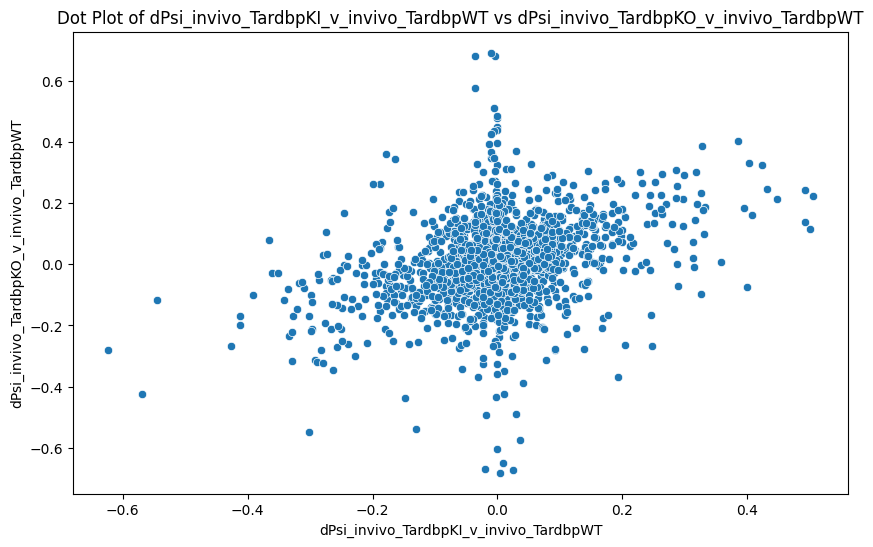

In [47]:
# Make the dot plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_ms_all_sigKOinvivo, x='dPsi_invivo_TardbpKI_v_invivo_TardbpWT', y='dPsi_invivo_TardbpKO_v_invivo_TardbpWT')

# Example data (replace with your actual data)
x = df_ms_all_sigKOinvivo['dPsi_invivo_TardbpKI_v_invivo_TardbpWT']
y = df_ms_all_sigKOinvivo['dPsi_invivo_TardbpKO_v_invivo_TardbpWT']

# Check for NaN values and handle them
nan_mask = np.isnan(x) | np.isnan(y)
x = x[~nan_mask]
y = y[~nan_mask]

# Compute the Pearson correlation coefficient and p-value
pearson_corr, p_value = pearsonr(x, y)

# Print the Pearson correlation coefficient and p-value
print(f'Pearson correlation coefficient: {pearson_corr:.2f}')
print(f'P-value: {p_value:.4f}')

# Adding axis labels and title
plt.xlabel('dPsi_invivo_TardbpKI_v_invivo_TardbpWT')
plt.ylabel('dPsi_invivo_TardbpKO_v_invivo_TardbpWT')
plt.title('Dot Plot of dPsi_invivo_TardbpKI_v_invivo_TardbpWT vs dPsi_invivo_TardbpKO_v_invivo_TardbpWT')

# Show the plot
plt.show()

Pearson correlation coefficient: 0.33
P-value: 0.0000


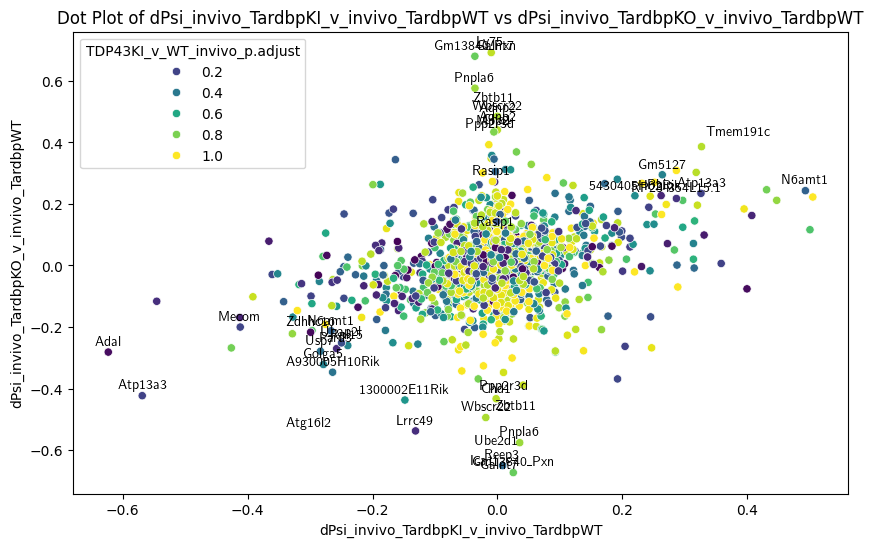

In [48]:
# Make the dot plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_ms_all_sigKOinvivo, 
                x='dPsi_invivo_TardbpKI_v_invivo_TardbpWT', 
                y='dPsi_invivo_TardbpKO_v_invivo_TardbpWT',
                hue='TDP43KI_v_WT_invivo_p.adjust',  # Color by this column
                palette='viridis')  # Choose a color palette (adjust as needed)

rcParams['text.usetex'] = True

# Example data (replace with your actual data)
x = df_ms_all_sigKOinvivo['dPsi_invivo_TardbpKI_v_invivo_TardbpWT']
y = df_ms_all_sigKOinvivo['dPsi_invivo_TardbpKO_v_invivo_TardbpWT']

# Check for NaN values and handle them
nan_mask = np.isnan(x) | np.isnan(y)
x = x[~nan_mask]
y = y[~nan_mask]

# Compute the Pearson correlation coefficient and p-value
pearson_corr, p_value = pearsonr(x, y)

# Print the Pearson correlation coefficient and p-value
print(f'Pearson correlation coefficient: {pearson_corr:.2f}')
print(f'P-value: {p_value:.4f}')

# Filter data based on condition
filtered_df = df_ms_all_sigKOinvivo[
    (
        (
            (df_ms_all_sigKOinvivo['TDP43KI_v_WT_invivo_p.adjust'] < 0.5) &
            (df_ms_all_sigKOinvivo['dPsi_invivo_TardbpKO_v_invivo_TardbpWT'] > 0.2) &
            (df_ms_all_sigKOinvivo['dPsi_invivo_TardbpKI_v_invivo_TardbpWT'] > 0.2)
        ) |
        (
            (df_ms_all_sigKOinvivo['TDP43KI_v_WT_invivo_p.adjust'] < 0.5) &
            (df_ms_all_sigKOinvivo['dPsi_invivo_TardbpKO_v_invivo_TardbpWT'] < -0.2) &
            (df_ms_all_sigKOinvivo['dPsi_invivo_TardbpKI_v_invivo_TardbpWT'] < -0.2)
        )
    ) |
    (df_ms_all_sigKOinvivo['dPsi_invivo_TardbpKO_v_invivo_TardbpWT'] < -0.4) |
    (df_ms_all_sigKOinvivo['dPsi_invivo_TardbpKO_v_invivo_TardbpWT'] > 0.4) |
    (df_ms_all_sigKOinvivo['GeneName'] == 'Rasip1')
]

# Annotate points that meet the condition
for index, row in filtered_df.iterrows():
    plt.annotate(row['GeneName'], 
                 (row['dPsi_invivo_TardbpKI_v_invivo_TardbpWT'], row['dPsi_invivo_TardbpKO_v_invivo_TardbpWT']),
                 textcoords="offset points", 
                 xytext=(0, 5),
                 ha='center')

# Adding axis labels and title
plt.xlabel('dPsi_invivo_TardbpKI_v_invivo_TardbpWT')
plt.ylabel('dPsi_invivo_TardbpKO_v_invivo_TardbpWT')
plt.title('Dot Plot of dPsi_invivo_TardbpKI_v_invivo_TardbpWT vs dPsi_invivo_TardbpKO_v_invivo_TardbpWT')

# Save the figure to a PDF file
file_path = '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2024_GSEA_Ashok/KO_v_KI_splicing.pdf'

with PdfPages(file_path) as pdf:
    pdf.savefig(dpi=600)

# Display the plot
plt.show()


Pearson correlation coefficient: 0.45
P-value: 0.0000


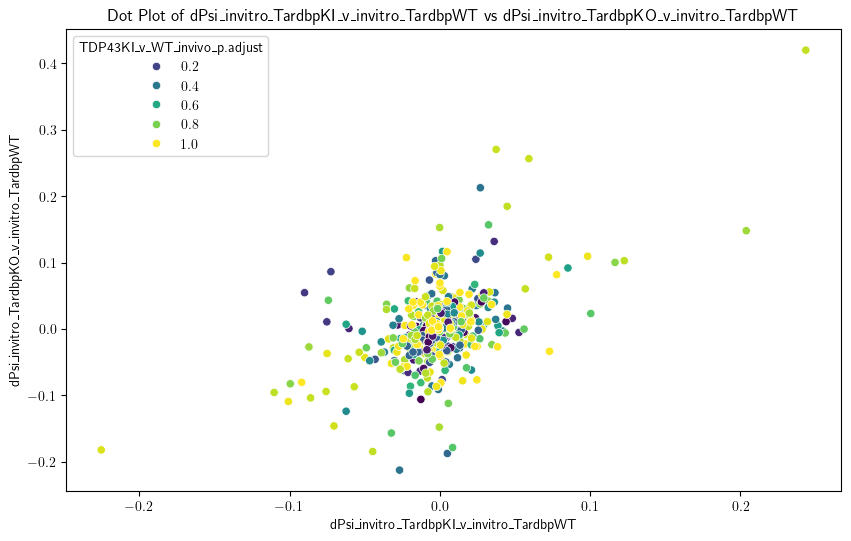

In [43]:
#Compare KI to KO in vitro

# Make the dot plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_ms_all_sigKOinvitro, 
                x='dPsi_invitro_TardbpKI_v_invitro_TardbpWT', 
                y='dPsi_invitro_TardbpKO_v_invitro_TardbpWT',
                hue='TDP43KI_v_WT_invivo_p.adjust',  # Color by this column
                palette='viridis')  # Choose a color palette (adjust as needed)

# Example data (replace with your actual data)
x = df_ms_all_sigKOinvitro['dPsi_invitro_TardbpKI_v_invitro_TardbpWT']
y = df_ms_all_sigKOinvitro['dPsi_invitro_TardbpKO_v_invitro_TardbpWT']

# Check for NaN values and handle them
nan_mask = np.isnan(x) | np.isnan(y)
x = x[~nan_mask]
y = y[~nan_mask]

# Compute the Pearson correlation coefficient and p-value
pearson_corr, p_value = pearsonr(x, y)

# Print the Pearson correlation coefficient and p-value
print(f'Pearson correlation coefficient: {pearson_corr:.2f}')
print(f'P-value: {p_value:.4f}')

# Adding axis labels and title
plt.xlabel('dPsi_invitro_TardbpKI_v_invitro_TardbpWT')
plt.ylabel('dPsi_invitro_TardbpKO_v_invitro_TardbpWT')
plt.title('Dot Plot of dPsi_invitro_TardbpKI_v_invitro_TardbpWT vs dPsi_invitro_TardbpKO_v_invitro_TardbpWT')

# Show the plot
plt.show()

# Section to examine transcripts affected by splicing (Leafcutter) and total expression (DESeq2)

In [49]:
df_ms_all_correct_DESeq2

,GeneName,GroupID,FeatureID,FeatureType,FeatureLabel,strand,p-value,q-value,dPSI,psi(KIKO),psi(WT),Reads_TardbpKIhet1,Reads_InVivoTardbpBrECWT2,Reads_InVivoTardbpBrECKO5,Reads_InVivoGrnKIhomo2,Reads_InVivoTardbpBrECKO2,Reads_Tardbp_ECKO.OuterFlow,Reads_InVivoTardbpKIhet3,Reads_InVivoGrnKIhet1,Reads_Tardbp_WT.OuterFlow,Reads_TardbpKIhet2.TNF,Reads_Tardbp_WT,Reads_TardbpKIhet1.InnerFlow,Reads_Tardbp_WT.TNF,Reads_TardbpKIhet2,Reads_InVivoGrnKIwt1,Reads_TardbpKIhet2.InnerFlow,Reads_TardbpKIhet1.TNF,Reads_InVivoTardbpKIwt2,Reads_TardbpKIwt2,Reads_InVivoTardbpKIhet1,Reads_TardbpKIwt2.TNF,Reads_InVivoTardbpBrECWT5,Reads_TardbpKIwt2.InnerFlow,Reads_TardbpKIhet1.OuterFlow,Reads_InVivoGrnKIwt2,Reads_TardbpKIwt1.OuterFlow,Reads_Tardbp_ECKO,Reads_InVivoTardbpBrECKO1,Reads_InVivoTardbpBrECKO4,Reads_InVivoTardbpBrECWT6,Reads_InVivoTardbpKIwt1,Reads_InVivoTardbpBrECKO3,Reads_InVivoTardbpKIhet2,Reads_TardbpKIwt2.OuterFlow,Reads_TardbpKIhet2.OuterFlow,Reads_InVivoTardbpBrECWT1,Reads_TardbpKIwt1,Reads_InVivoTardbpKIwt3,Reads_InVivoTardbpBrECKO6,Reads_TardbpKIwt1.InnerFlow,Reads_Tardbp_ECKO.TNF,Reads_Tardbp_ECKO.InnerFlow,Reads_InVivoGrnKIhet2,Reads_Tardbp_WT.InnerFlow,Reads_TardbpKIwt1.TNF,Reads_InVivoTardbpBrECWT4,Reads_InVivoGrnKIhomo1,Reads_InVivoTardbpBrECWT3,Psi_TardbpKIhet1,Psi_InVivoTardbpBrECWT2,Psi_InVivoTardbpBrECKO5,Psi_InVivoGrnKIhomo2,Psi_InVivoTardbpBrECKO2,Psi_Tardbp_ECKO.OuterFlow,Psi_InVivoTardbpKIhet3,Psi_InVivoGrnKIhet1,Psi_Tardbp_WT.OuterFlow,Psi_TardbpKIhet2.TNF,Psi_Tardbp_WT,Psi_TardbpKIhet1.InnerFlow,Psi_Tardbp_WT.TNF,Psi_TardbpKIhet2,Psi_InVivoGrnKIwt1,Psi_TardbpKIhet2.InnerFlow,Psi_TardbpKIhet1.TNF,Psi_InVivoTardbpKIwt2,Psi_TardbpKIwt2,Psi_InVivoTardbpKIhet1,Psi_TardbpKIwt2.TNF,Psi_InVivoTardbpBrECWT5,Psi_TardbpKIwt2.InnerFlow,Psi_TardbpKIhet1.OuterFlow,Psi_InVivoGrnKIwt2,Psi_TardbpKIwt1.OuterFlow,Psi_Tardbp_ECKO,Psi_InVivoTardbpBrECKO1,Psi_InVivoTardbpBrECKO4,Psi_InVivoTardbpBrECWT6,Psi_InVivoTardbpKIwt1,Psi_InVivoTardbpBrECKO3,Psi_InVivoTardbpKIhet2,Psi_TardbpKIwt2.OuterFlow,Psi_TardbpKIhet2.OuterFlow,Psi_InVivoTardbpBrECWT1,Psi_TardbpKIwt1,Psi_InVivoTardbpKIwt3,Psi_InVivoTardbpBrECKO6,Psi_TardbpKIwt1.InnerFlow,Psi_Tardbp_ECKO.TNF,Psi_Tardbp_ECKO.InnerFlow,Psi_InVivoGrnKIhet2,Psi_Tardbp_WT.InnerFlow,Psi_TardbpKIwt1.TNF,Psi_InVivoTardbpBrECWT4,Psi_InVivoGrnKIhomo1,Psi_InVivoTardbpBrECWT3,chromosome,cluster,TDP43ECKO_v_WT_invitro_status,TDP43ECKO_v_WT_invitro_loglr,TDP43ECKO_v_WT_invitro_df,TDP43ECKO_v_WT_invitro_p,TDP43ECKO_v_WT_invitro_p.adjust,TDP43ECKO_v_WT_invitro_genes,TDP43KI_v_WT_invitro_status,TDP43KI_v_WT_invitro_loglr,TDP43KI_v_WT_invitro_df,TDP43KI_v_WT_invitro_p,TDP43KI_v_WT_invitro_p.adjust,TDP43KI_v_WT_invitro_genes,TDP43KI_v_WT_invivo_status,TDP43KI_v_WT_invivo_loglr,TDP43KI_v_WT_invivo_df,TDP43KI_v_WT_invivo_p,TDP43KI_v_WT_invivo_p.adjust,TDP43KI_v_WT_invivo_genes,TDP43ECKO_v_WT_invivo_status,TDP43ECKO_v_WT_invivo_loglr,TDP43ECKO_v_WT_invivo_df,TDP43ECKO_v_WT_invivo_p,TDP43ECKO_v_WT_invivo_p.adjust,TDP43ECKO_v_WT_invivo_genes,GRNKI_v_WT_invivo_status,GRNKI_v_WT_invivo_loglr,GRNKI_v_WT_invivo_df,GRNKI_v_WT_invivo_p,GRNKI_v_WT_invivo_p.adjust,GRNKI_v_WT_invivo_genes,TDP43GRNKIKO_v_wt_invivo_status,TDP43GRNKIKO_v_wt_invivo_loglr,TDP43GRNKIKO_v_wt_invivo_df,TDP43GRNKIKO_v_wt_invivo_p,TDP43GRNKIKO_v_wt_invivo_p.adjust,TDP43GRNKIKO_v_wt_invivo_genes,invitro_TardbpKI_row_mean_Psi,invitro_TardbpKO_row_mean_Psi,invitro_TardbpWT_row_mean_Psi,invivo_GrnKI_row_mean_Psi,invivo_GrnWT_row_mean_Psi,invivo_TardbpKI_row_mean_Psi,invivo_TardbpKO_row_mean_Psi,invivo_TardbpWT_row_mean_Psi,invitro_TardbpKI_row_min_reads,invitro_TardbpKO_row_min_reads,invitro_TardbpWT_row_min_reads,invivo_GrnKI_row_min_reads,invivo_GrnWT_row_min_reads,invivo_TardbpKI_row_min_reads,invivo_TardbpKO_row_min_reads,invivo_TardbpWT_row_min_reads,invitro_TardbpKI_row_mean_reads,invitro_TardbpKO_row_mean_reads,invitro_TardbpWT_row_mean_reads,invivo_GrnKI_row_mean_reads,invivo_GrnWT_row_mean_reads,invivo_TardbpKI_row_mean_reads,invivo_TardbpKO_row_mea

In [54]:
# Initialize the Biomart server
server = BiomartServer( "http://www.ensembl.org/biomart" )
server.verbose = True

# Choose the dataset
dataset = server.datasets['mmusculus_gene_ensembl']

# Define the attributes you want to retrieve
attributes = ['external_gene_name', 'hsapiens_homolog_associated_gene_name']

# Query mouse to human mappings
response = dataset.search({
    'attributes': attributes
})

# Create a dictionary for mouse to human gene mappings
m2h_dict = {}

# Process the response line by line
for line in response.iter_lines():
    line = line.decode('utf-8')  # Convert bytes to string if necessary
    row = line.split("\t")
    # Check if any of the required fields is missing
    if len(row) == 2 and None not in row:
        mouse_gene, human_homolog = row
        m2h_dict[mouse_gene] = human_homolog

[BiomartServer:'http://www.ensembl.org/biomart/martservice'] Fetching datasets
[BiomartServer:'http://www.ensembl.org/biomart/martservice'] Fetching databases
[BiomartDatabase:'Ensembl Genes 112'] Fetching datasets
[BiomartDatabase:'Mouse strains 112'] Fetching datasets
[BiomartDatabase:'Sequence'] Fetching datasets
[BiomartDatabase:'Ontology'] Fetching datasets
[BiomartDatabase:'Genomic features 112'] Fetching datasets
[BiomartDatabase:'Ensembl Variation 112'] Fetching datasets
[BiomartDatabase:'Ensembl Regulation 112'] Fetching datasets
[BiomartDataset:'mmusculus_gene_ensembl'] Searching using following params:
{'attributes': ['external_gene_name', 'hsapiens_homolog_associated_gene_name']}
[BiomartDataset:'mmusculus_gene_ensembl'] Fetching attributes
[BiomartDataset] search query:
b'<Query virtualSchemaName="default" formatter="TSV" header="0" uniqueRows="1" datasetConfigVersion="0.6" count=""><Dataset name="mmusculus_gene_ensembl" interface="default"><Attribute name="external_gene_n

In [132]:
#Filter data for cytoscape

filtered_df_Cytoscape = df_ms_all_correct_DESeq2[
    (
        (df_ms_all_correct_DESeq2['TDP43ECKO_v_WT_invivo_p'] < 0.05) &
        (df_ms_all_correct_DESeq2['dPsi_invivo_TardbpKO_v_invivo_TardbpWT'] > 0.05)
    ) | 
    (
        (df_ms_all_correct_DESeq2['TDP43ECKO_v_WT_invivo_p'] < 0.05) &
        (df_ms_all_correct_DESeq2['dPsi_invivo_TardbpKO_v_invivo_TardbpWT'] < -0.05)
    ) #|
    #(
    #   (df_ms_all_correct_DESeq2['InVivoTardbpECKO_KO_v_WT_DESeq2_pvalue'] < 0.05))
]

filtered_df_Cytoscape.to_csv('/Users/patrickmurphy/Desktop/filtered_df_Cytoscape.csv')

In [133]:
filtered_df_Cytoscape.loc[:, 'HumanGeneName'] = filtered_df_Cytoscape['GeneName'].map(m2h_dict)

/var/folders/jg/0_nc4hf97r35tfbtk88gdln40000gn/T/ipykernel_63633/876460040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [134]:
unique_human_gene_names = filtered_df_Cytoscape['HumanGeneName'].unique()
print("Number of unique HumanGeneNames:", unique_human_gene_names)

Number of unique HumanGeneNames: [nan 'C1orf122' '' ... 'ZW10' 'ZWINT' 'ZZZ3']


In [135]:
# Convert unique_human_gene_names to a list of strings
gene_list = list(unique_human_gene_names.astype(str))

top_genes_res = gseapy.enrichr(gene_list=gene_list,
        gene_sets=['MSigDB_Hallmark_2020','KEGG_2021_Human', 'GO_Biological_Process_2023', 'Reactome_2022'],
        organism='human')

In [136]:
top_genes_res.results.head(50)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,MSigDB_Hallmark_2020,Mitotic Spindle,37/199,6.343914e-07,0.000031,0,0,2.735203,39.032987,CEP57;DOCK4;TRIO;ITSN1;SMC4;ABR;AKAP13;BCL2L11...
1,MSigDB_Hallmark_2020,Interferon Alpha Response,17/97,1.299363e-03,0.031834,0,0,2.523197,16.768867,OGFR;RNF31;BATF2;PNPT1;CSF1;IL15;RIPK2;MX1;EIF...
2,MSigDB_Hallmark_2020,heme Metabolism,26/200,7.192363e-03,0.090710,0,0,1.775507,8.761657,USP15;HTRA2;CLCN3;ADD1;TRAK2;AGPAT4;SDCBP;NNT;...
3,MSigDB_Hallmark_2020,Protein Secretion,15/96,7.404917e-03,0.090710,0,0,2.195904,10.772251,ARFGEF1;ARFGEF2;STX16;GBF1;COG2;ARFGAP3;CLCN3;...
4,MSigDB_Hallmark_2020,Adipogenesis,25/200,1.327465e-02,0.130092,0,0,1.696266,7.331090,SLC27A1;ITSN1;ARAF;MRPL15;SLC1A5;ADIPOR2;SULT1...
5,MSigDB_Hallmark_2020,DNA Repair,19/150,2.492928e-02,0.203589,0,0,1.719604,6.348283,CANT1;RFC2;RNMT;TAF13;CSTF3;NPR2;DCTN4;GTF2H1;...
6,MSigDB_Hallmark_2020,UV Response Dn,18/144,3.199439e-02,0.214531,0,0,1.693111,5.828019,NRP1;WDR37;RBPMS;YTHDC1;ANXA4;ATRX;PTPRM;PTPN2...
7,MSigDB_Hallmark_2020,Myc Targets V2,9/58,3.502549e-02,0.214531,0,0,2.173351,7.284376,SUPV3L1;TCOF1;LAS1L;PRMT3;NOLC1;MAP3K6;FARSA;R...
8,MSigDB_Hallmark_2020,Wnt-beta Catenin Signaling,7/42,4.250870e-02,0.231436,0,0,2.365296,7.469714,NCOR2;JAG1;LEF1;TCF7;AXIN1;NUMB;TP53
9,MSigDB_Hallmark_2020,PI3K/AKT/mTOR Signaling,12/105,1.178521e-01,0.475124,0,0,1.526091,3.263279,SMAD2;MAPK9;PIKFYVE;RALB;MKNK1;PRKAG1;TSC2;ITP...


/Users/patrickmurphy/mambaforge/envs/jupyterenv/lib/python3.11/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
/Users/patrickmurphy/mambaforge/envs/jupyterenv/lib/python3.11/site-packages/gseapy/plot.py:689: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.




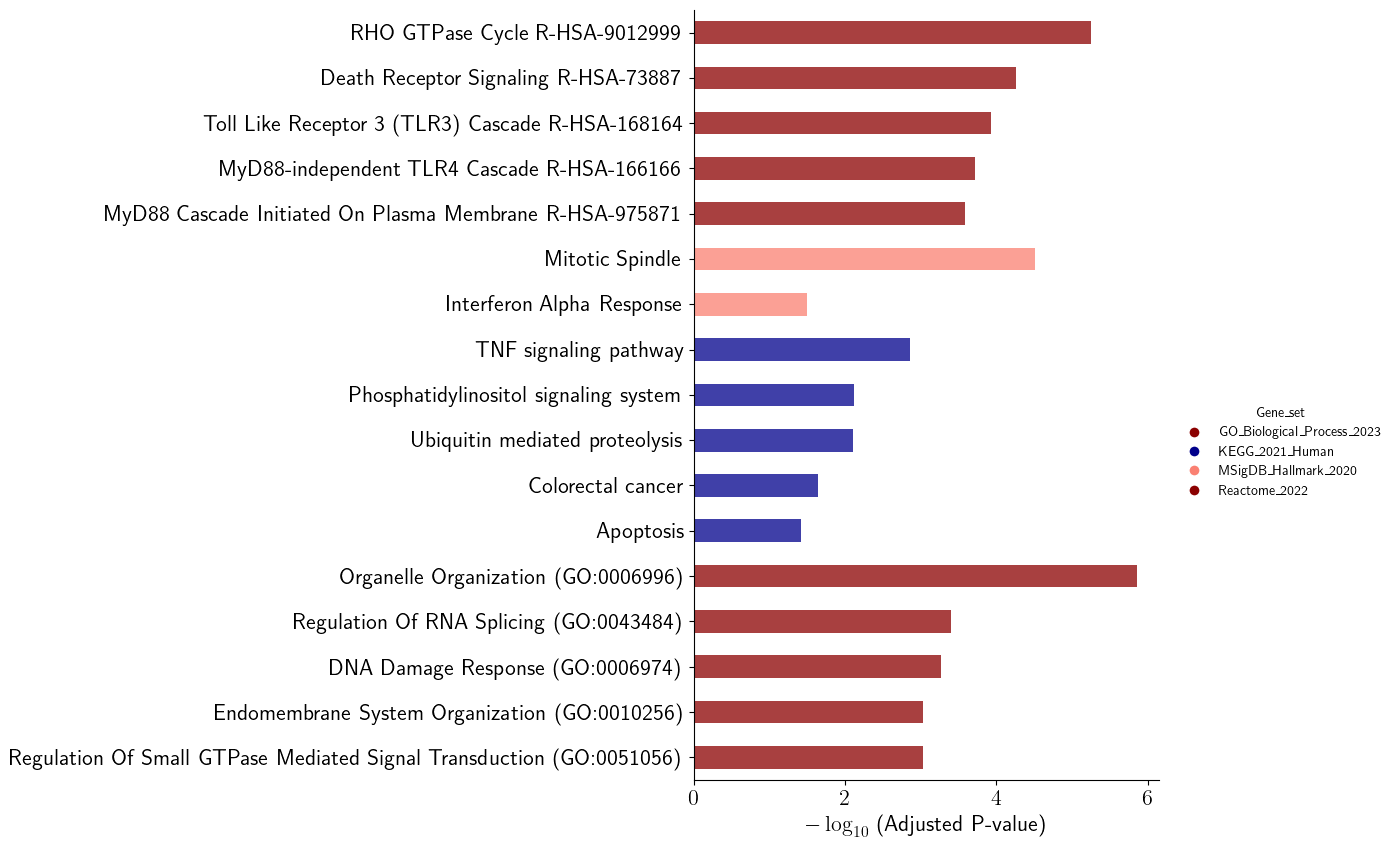

In [143]:
# categorical scatterplot
ax = barplot(top_genes_res.results,
              column="Adjusted P-value",
              group='Gene_set', # set group, so you could do a multi-sample/library comparsion
              size=10,
              top_term=5,
              figsize=(6,10),
              color=['darkred', 'darkblue', 'salmon'] # set colors for group
             )

In [151]:
# Define the desired gene sets
desired_gene_sets = ['MSigDB_Hallmark_2020', 'KEGG_2021_Human']

# Filter by desired gene sets and padj < 0.05
top_genes_res_filtered = top_genes_res.results[
    (top_genes_res.results['Gene_set'].isin(desired_gene_sets))
]

In [152]:
top_genes_res_filtered

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,MSigDB_Hallmark_2020,Mitotic Spindle,37/199,6.343914e-07,0.000031,0,0,2.735203,3.903299e+01,CEP57;DOCK4;TRIO;ITSN1;SMC4;ABR;AKAP13;BCL2L11...
1,MSigDB_Hallmark_2020,Interferon Alpha Response,17/97,1.299363e-03,0.031834,0,0,2.523197,1.676887e+01,OGFR;RNF31;BATF2;PNPT1;CSF1;IL15;RIPK2;MX1;EIF...
2,MSigDB_Hallmark_2020,heme Metabolism,26/200,7.192363e-03,0.090710,0,0,1.775507,8.761657e+00,USP15;HTRA2;CLCN3;ADD1;TRAK2;AGPAT4;SDCBP;NNT;...
3,MSigDB_Hallmark_2020,Protein Secretion,15/96,7.404917e-03,0.090710,0,0,2.195904,1.077225e+01,ARFGEF1;ARFGEF2;STX16;GBF1;COG2;ARFGAP3;CLCN3;...
4,MSigDB_Hallmark_2020,Adipogenesis,25/200,1.327465e-02,0.130092,0,0,1.696266,7.331090e+00,SLC27A1;ITSN1;ARAF;MRPL15;SLC1A5;ADIPOR2;SULT1...
...,...,...,...,...,...,...,...,...,...,...
339,KEGG_2021_Human,Diabetic cardiomyopathy,5/203,9.997062e-01,0.999995,0,0,0.295623,8.686755e-05,SMAD2;MAPK9;NDUFS8;PIK3CB;PLCB1
340,KEGG_2021_Human,Oxidative phosphorylation,2/133,9.997593e-01,0.999995,0,0,0.179040,4.309903e-05,NDUFS8;ATP6V0A1
341,KEGG_2021_Human,Cytokine-cytokine receptor interaction,9/295,9.998225e-01,0.999995,0,0,0.367558,6.523055e-05,ACVR1;ACVRL1;CSF1;IL15;FAS;TNFRSF14;CX3CL1;IL2...
342,KEGG_2021_Human,Olfactory transduction,3/440,9.999951e-01,0.999995,0,0,0.079211,3.898309e-07,PDE2A;CALML4;CNGB1


/Users/patrickmurphy/mambaforge/envs/jupyterenv/lib/python3.11/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
/Users/patrickmurphy/mambaforge/envs/jupyterenv/lib/python3.11/site-packages/gseapy/plot.py:689: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.




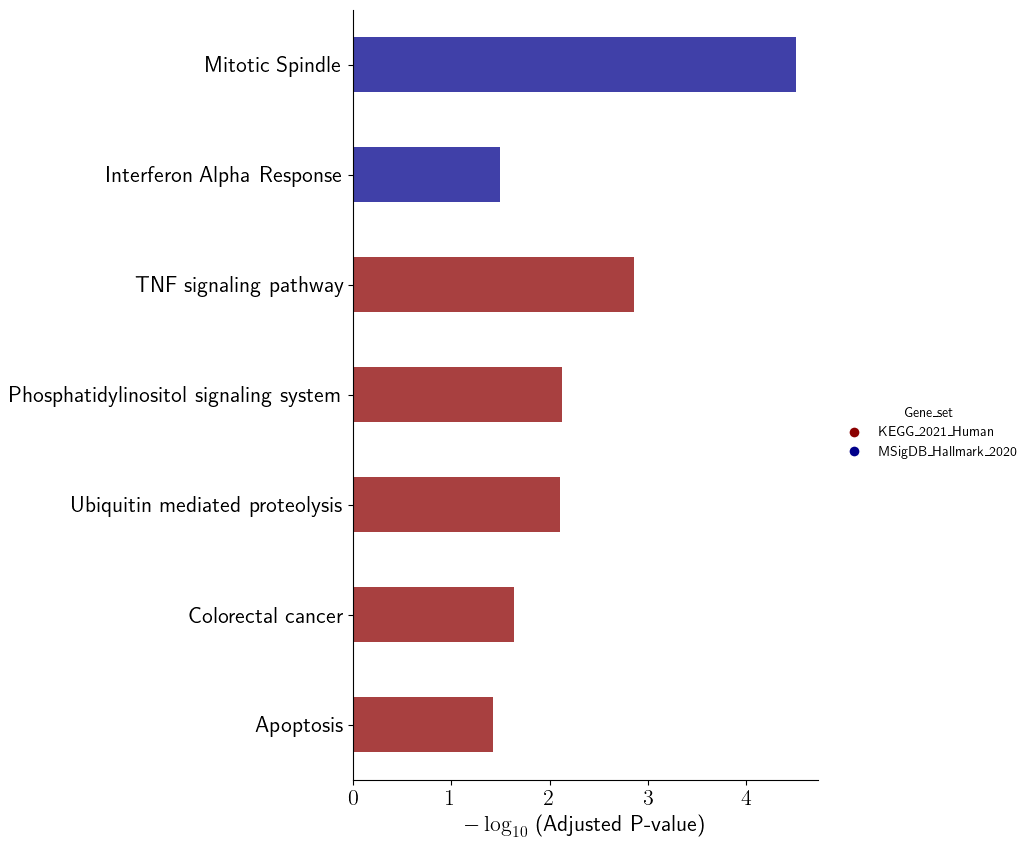

In [154]:
# categorical scatterplot
ax = barplot(top_genes_res_filtered,
              column="Adjusted P-value",
              group='Gene_set', # set group, so you could do a multi-sample/library comparsion
              size=10,
              top_term=5,
              figsize=(6,10),
              color=['darkred', 'darkblue', 'salmon'] # set colors for group
             )

# Save the figure to a PDF file
file_path = '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2024_GSEA_Ashok/splicing_GSEA_enrichr.pdf'

with PdfPages(file_path) as pdf:
    pdf.savefig(dpi=600)

# Display the plot
plt.show()

# Section to filter on transcripts spliced similarly in KI and KO for GSEA analysis

In [165]:
#Filter data for KI and KO similarity

filtered_df_KIKO = df_ms_all_correct_DESeq2[
    (
        (df_ms_all_correct_DESeq2['TDP43ECKO_v_WT_invivo_p'] < 0.05) &
        (df_ms_all_correct_DESeq2['dPsi_invivo_TardbpKO_v_invivo_TardbpWT'] > 0.05) &
        (df_ms_all_correct_DESeq2['dPsi_invivo_TardbpKI_v_invivo_TardbpWT'] > 0.05)
    ) | 
    (
        (df_ms_all_correct_DESeq2['TDP43ECKO_v_WT_invivo_p'] < 0.05) &
        (df_ms_all_correct_DESeq2['dPsi_invivo_TardbpKO_v_invivo_TardbpWT'] < -0.05) &
        (df_ms_all_correct_DESeq2['dPsi_invivo_TardbpKI_v_invivo_TardbpWT'] < -0.05)
    ) |
    (
        (df_ms_all_correct_DESeq2['TDP43KI_v_WT_invivo_p'] < 0.05) &
        (df_ms_all_correct_DESeq2['dPsi_invivo_TardbpKO_v_invivo_TardbpWT'] > 0.05) &
        (df_ms_all_correct_DESeq2['dPsi_invivo_TardbpKI_v_invivo_TardbpWT'] > 0.05)
    ) | 
    (
        (df_ms_all_correct_DESeq2['TDP43KI_v_WT_invivo_p'] < 0.05) &
        (df_ms_all_correct_DESeq2['dPsi_invivo_TardbpKO_v_invivo_TardbpWT'] < -0.05) &
        (df_ms_all_correct_DESeq2['dPsi_invivo_TardbpKI_v_invivo_TardbpWT'] < -0.05))
    #(
    #   (df_ms_all_correct_DESeq2['InVivoTardbpECKO_KO_v_WT_DESeq2_pvalue'] < 0.05))
]

filtered_df_KIKO.to_csv('/Users/patrickmurphy/Desktop/filtered_df_Cytoscape.csv')

In [166]:
filtered_df_KIKO.loc[:, 'HumanGeneName'] = filtered_df_KIKO['GeneName'].map(m2h_dict)

/var/folders/jg/0_nc4hf97r35tfbtk88gdln40000gn/T/ipykernel_63633/791396878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [167]:
unique_human_gene_names = filtered_df_Cytoscape['HumanGeneName'].unique()
print("Number of unique HumanGeneNames:", unique_human_gene_names)

Number of unique HumanGeneNames: [nan 'C1orf122' '' ... 'ZW10' 'ZWINT' 'ZZZ3']


In [168]:
# Convert unique_human_gene_names to a list of strings
gene_list = list(unique_human_gene_names.astype(str))

top_genes_res = gseapy.enrichr(gene_list=gene_list,
        gene_sets=['MSigDB_Hallmark_2020','KEGG_2021_Human', 'GO_Biological_Process_2023', 'Reactome_2022'],
        organism='human')

In [169]:
top_genes_res.results.head(50)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,MSigDB_Hallmark_2020,Mitotic Spindle,37/199,6.343914e-07,0.000031,0,0,2.735203,39.032987,CEP57;DOCK4;TRIO;ITSN1;SMC4;ABR;AKAP13;BCL2L11...
1,MSigDB_Hallmark_2020,Interferon Alpha Response,17/97,1.299363e-03,0.031834,0,0,2.523197,16.768867,OGFR;RNF31;BATF2;PNPT1;CSF1;IL15;RIPK2;MX1;EIF...
2,MSigDB_Hallmark_2020,heme Metabolism,26/200,7.192363e-03,0.090710,0,0,1.775507,8.761657,USP15;HTRA2;CLCN3;ADD1;TRAK2;AGPAT4;SDCBP;NNT;...
3,MSigDB_Hallmark_2020,Protein Secretion,15/96,7.404917e-03,0.090710,0,0,2.195904,10.772251,ARFGEF1;ARFGEF2;STX16;GBF1;COG2;ARFGAP3;CLCN3;...
4,MSigDB_Hallmark_2020,Adipogenesis,25/200,1.327465e-02,0.130092,0,0,1.696266,7.331090,SLC27A1;ITSN1;ARAF;MRPL15;SLC1A5;ADIPOR2;SULT1...
5,MSigDB_Hallmark_2020,DNA Repair,19/150,2.492928e-02,0.203589,0,0,1.719604,6.348283,CANT1;RFC2;RNMT;TAF13;CSTF3;NPR2;DCTN4;GTF2H1;...
6,MSigDB_Hallmark_2020,UV Response Dn,18/144,3.199439e-02,0.214531,0,0,1.693111,5.828019,NRP1;WDR37;RBPMS;YTHDC1;ANXA4;ATRX;PTPRM;PTPN2...
7,MSigDB_Hallmark_2020,Myc Targets V2,9/58,3.502549e-02,0.214531,0,0,2.173351,7.284376,SUPV3L1;TCOF1;LAS1L;PRMT3;NOLC1;MAP3K6;FARSA;R...
8,MSigDB_Hallmark_2020,Wnt-beta Catenin Signaling,7/42,4.250870e-02,0.231436,0,0,2.365296,7.469714,NCOR2;JAG1;LEF1;TCF7;AXIN1;NUMB;TP53
9,MSigDB_Hallmark_2020,PI3K/AKT/mTOR Signaling,12/105,1.178521e-01,0.475124,0,0,1.526091,3.263279,SMAD2;MAPK9;PIKFYVE;RALB;MKNK1;PRKAG1;TSC2;ITP...


In [170]:
# Define the desired gene sets
desired_gene_sets = ['MSigDB_Hallmark_2020', 'KEGG_2021_Human']

# Filter by desired gene sets and padj < 0.05
top_genes_res_filtered = top_genes_res.results[
    (top_genes_res.results['Gene_set'].isin(desired_gene_sets))
]

/Users/patrickmurphy/mambaforge/envs/jupyterenv/lib/python3.11/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
/Users/patrickmurphy/mambaforge/envs/jupyterenv/lib/python3.11/site-packages/gseapy/plot.py:689: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.




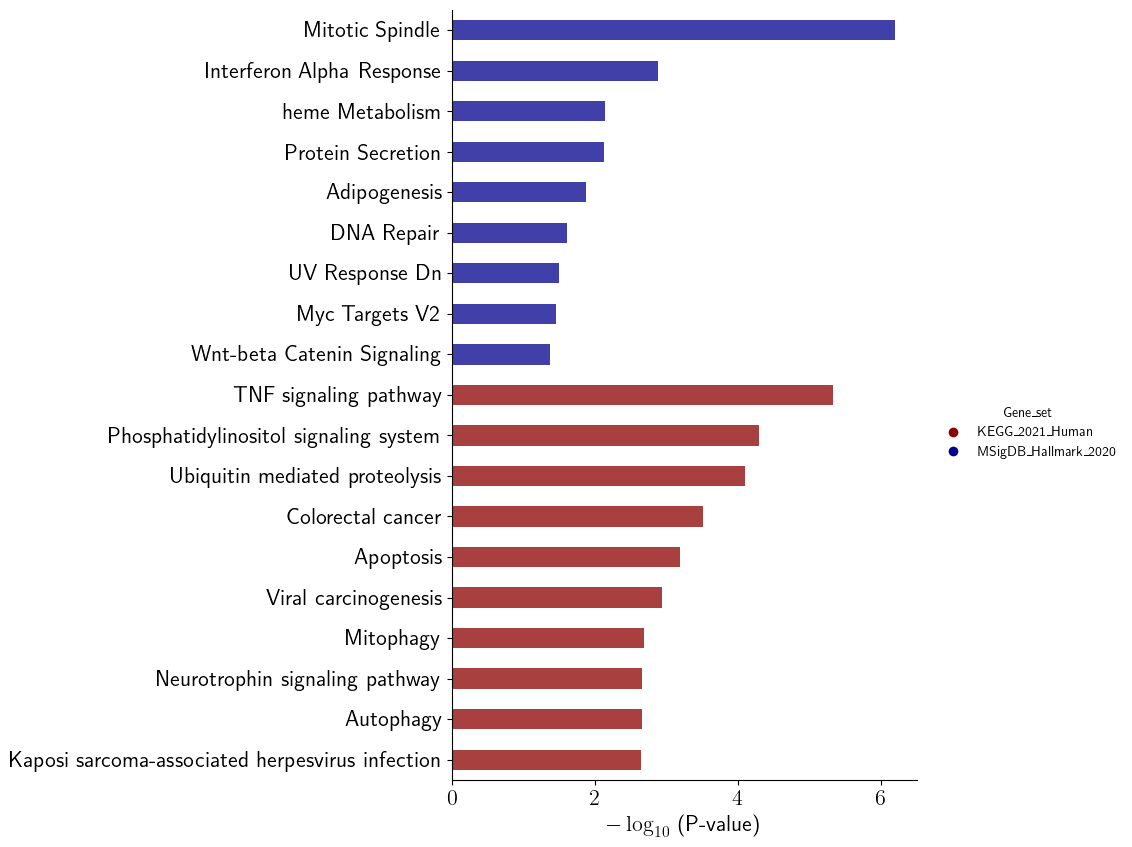

In [173]:
# categorical scatterplot
ax = barplot(top_genes_res_filtered,
              column="P-value",
              group='Gene_set', # set group, so you could do a multi-sample/library comparsion
              size=10,
              top_term=10,
              figsize=(6,10),
              color=['darkred', 'darkblue', 'salmon'] # set colors for group
             )

# Save the figure to a PDF file
file_path = '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2024_GSEA_Ashok/splicing_GSEA_enrichr.pdf'

with PdfPages(file_path) as pdf:
    pdf.savefig(dpi=600)

# Display the plot
plt.show()